In [96]:
# Step 1: Install Kaggle API
!pip install -q kaggle

# Step 2: Create kaggle.json with your credentials
import json
import os

kaggle_token = {
    "username": "himanshusoni001",
    "key": "7888d0ba07df9b4b51271fe3c97fac80"
}

# Expand ~ to home directory
basepath = os.path.expanduser("~/.kaggle")
# Write the token to the correct location
os.makedirs(basepath, exist_ok=True)
kaggle_json_path = os.path.join(basepath, 'kaggle.json')
with open(kaggle_json_path, 'w') as f:
    json.dump(kaggle_token, f)

# Set permission (600 = read/write for owner only)
os.chmod(kaggle_json_path, 0o600)


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [97]:
# Step 3: Download dataset using Kaggle API
# The kaggle.json file created in the previous cell will be used automatically
!kaggle competitions download -c house-prices-advanced-regression-techniques

# Step 4: Unzip the downloaded dataset
!unzip -o house-prices-advanced-regression-techniques.zip

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [98]:
# Step 5: Load and use the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('train.csv')

# Optional: Preview data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [99]:
data.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


#                    **DATA AUDIT AND AVAILABILITY CHECK**

In [100]:
# 1. Shape of the dataset
print("\nShape of dataset:", data.shape)



Shape of dataset: (1460, 81)


In [101]:
# 2. Data types of each column
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [102]:
# 3. Missing values per column
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [103]:
# 4. Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [104]:
# 5. Check for negative or invalid values
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols)
print("\nNegative values:")
for col in numeric_cols:
    if (data[col] < 0).any():
        print(f"\033[91mColumn '{col}' has negative values.\033[0m")
        print(data[data[col] < 0][[col]])
    else:
        print(f"\033[92mColumn '{col}' has no negative values.\033[0m")

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Negative values:
Column 'Id' has no negative values.
Column 'MSSubClass' has no negative values.
Column 'LotFrontage' has no negative values.
Column 'LotArea' has no negative values.
Column 'OverallQual' has no negative values.
Column 'OverallCond' has no negative values.
Column 'YearBuilt' has no negative values.
Column 'YearRemodAdd' has no negative values.
Column 'MasVnrArea' has no negative values.
Column 'BsmtFinSF1' has no negative values.
Column 'BsmtFinSF2' has no ne

In [105]:
# 6. Duplicate rows
print("\nNumber of duplicate rows:", data.duplicated().sum())


Number of duplicate rows: 0


# **EXPLORATORY DATA ANALYSIS**

In [106]:
#Summary statistics for numeric columns
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.06

In [107]:
#Summary statistics for categorical columns
for col in data.columns:
    if (data[col].dtype=='object'):
        print(f"\n{col}:")
        print(data[col].value_counts())
    else:
        pass


MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Alley:
Alley
Grvl    50
Pave    41
Name: count, dtype: int64

LotShape:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

LandContour:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

Utilities:
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

LotConfig:
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

LandSlope:
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Neighborhood:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR     

In [108]:
# Calculate average property prices across neighborhoods
average_price_by_neighborhood = data.groupby('Neighborhood')['SalePrice'].mean().sort_values()

# Identify the most affordable neighborhoods
affordable_neighborhoods = average_price_by_neighborhood.head(5)

# Identify the most expensive neighborhoods
expensive_neighborhoods = average_price_by_neighborhood.tail(5)

# Average property size and price by building type
average_size_and_price = data.groupby('BldgType')[['GrLivArea', 'SalePrice']].mean()

# Average price by overall quality
average_price_by_quality = data.groupby('OverallQual')['SalePrice'].mean().sort_values()

print("Average Price by Neighborhood:")
print(average_price_by_neighborhood)

print("\nMost Affordable Neighborhoods:")
print(affordable_neighborhoods)

print("\nMost Expensive Neighborhoods:")
print(expensive_neighborhoods)

print("\nAverage Living Area and Price by Building Type:")
print(average_size_and_price)

print("\nAverage Price by Overall Quality:")
print(average_price_by_quality)

Average Price by Neighborhood:
Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
OldTown    128225.300885
Sawyer     136793.135135
Blueste    137500.000000
SWISU      142591.360000
NPkVill    142694.444444
NAmes      145847.080000
Mitchel    156270.122449
SawyerW    186555.796610
NWAmes     189050.068493
Gilbert    192854.506329
Blmngtn    194870.882353
CollgCr    197965.773333
Crawfor    210624.725490
ClearCr    212565.428571
Somerst    225379.837209
Veenker    238772.727273
Timber     242247.447368
StoneBr    310499.000000
NridgHt    316270.623377
NoRidge    335295.317073
Name: SalePrice, dtype: float64

Most Affordable Neighborhoods:
Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
Name: SalePrice, dtype: float64

Most Expensive Neighborhoods:
Neighborhood
Veenker    238772.727273
Timber     242247.447368
Sto

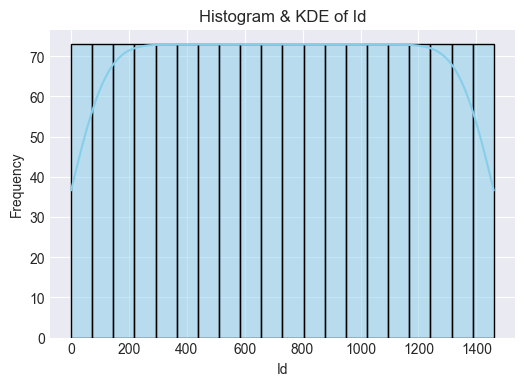

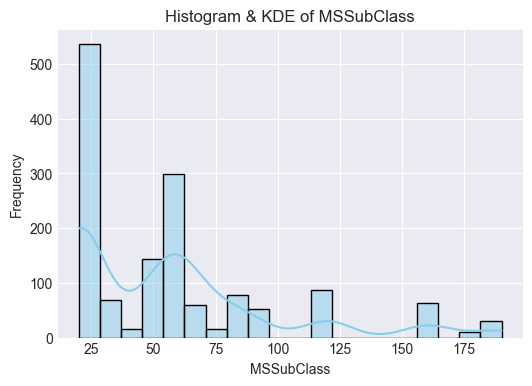

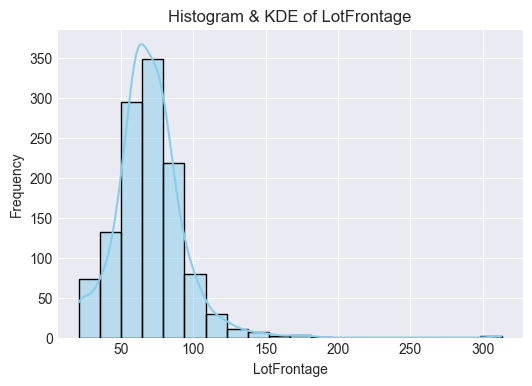

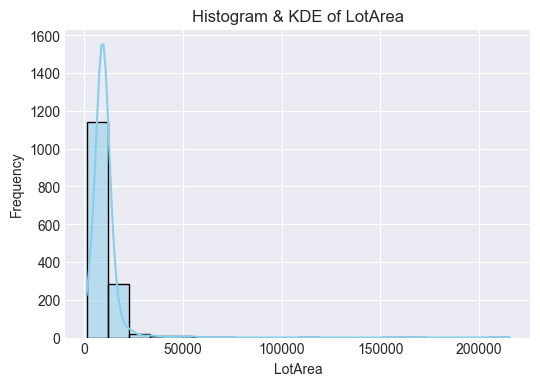

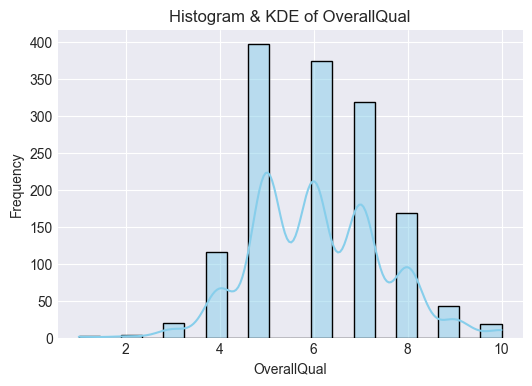

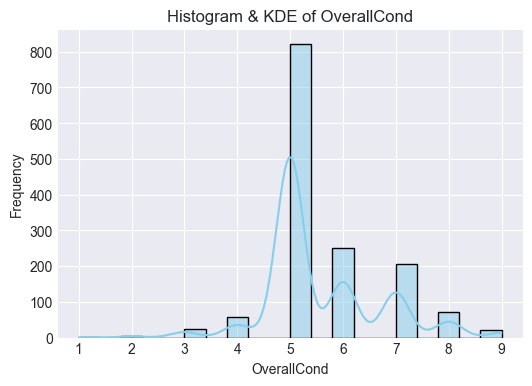

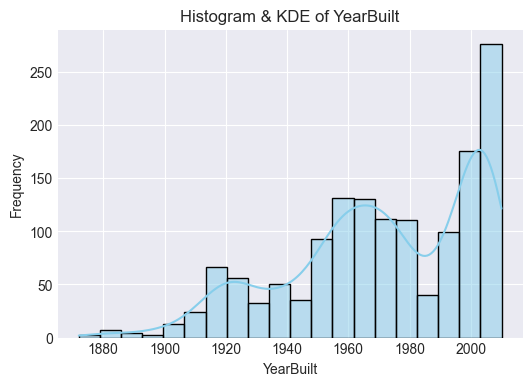

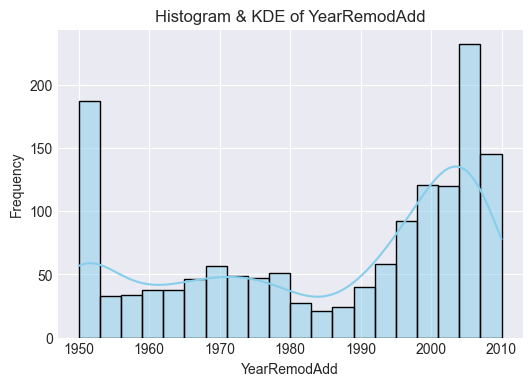

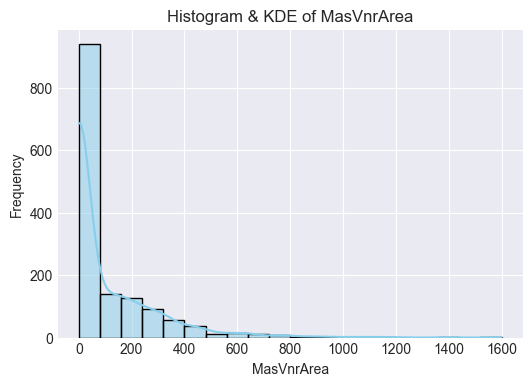

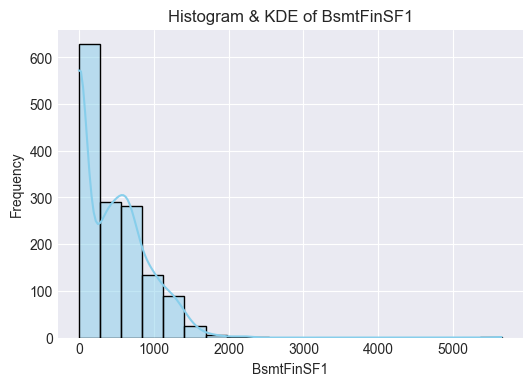

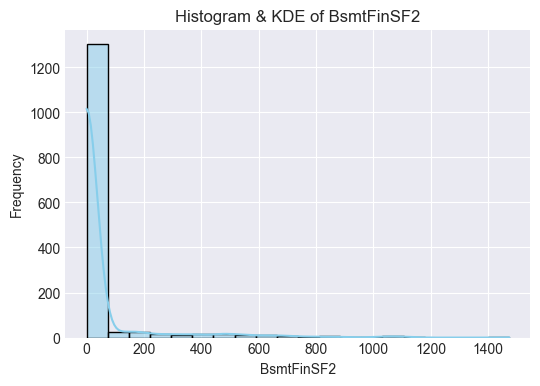

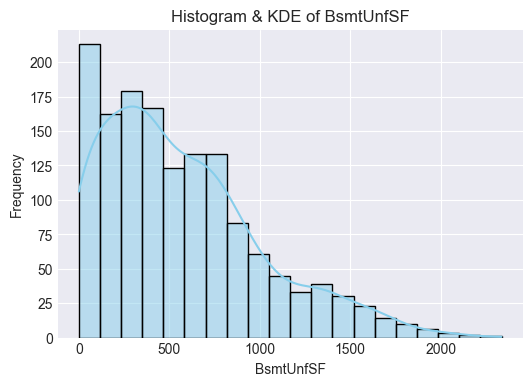

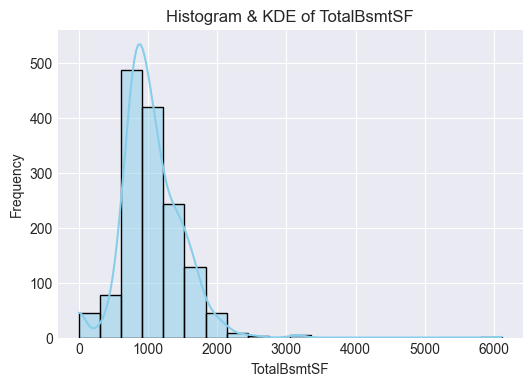

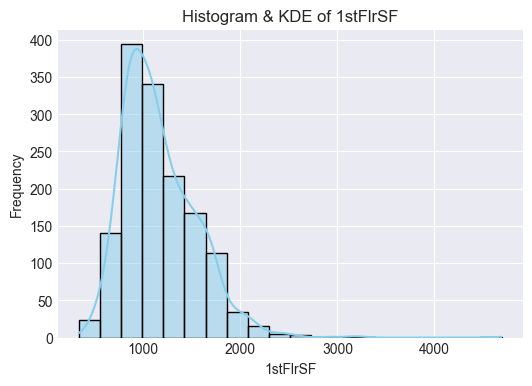

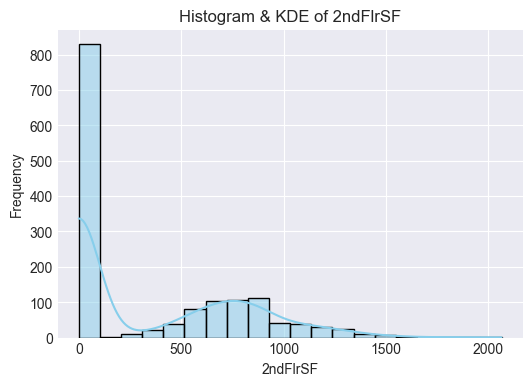

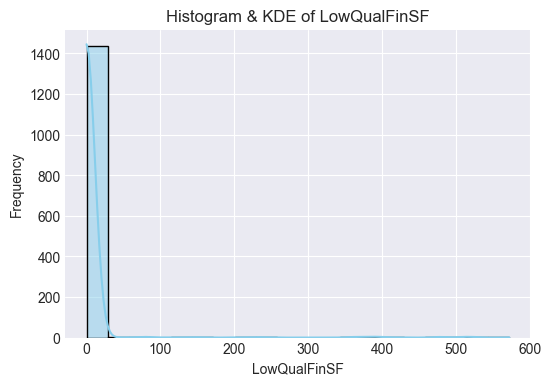

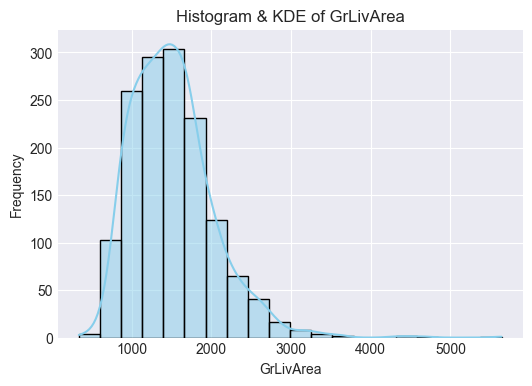

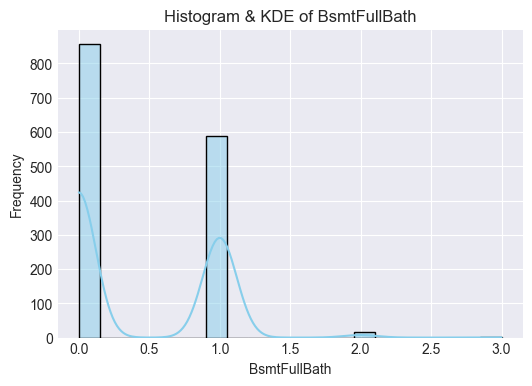

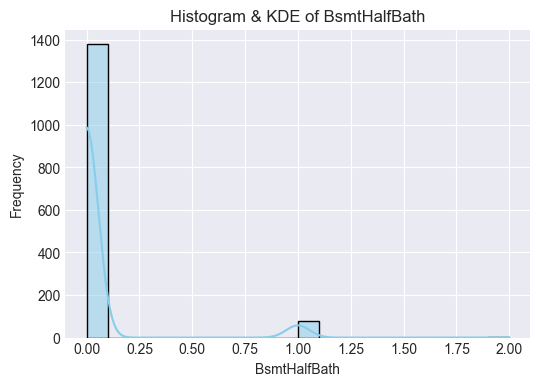

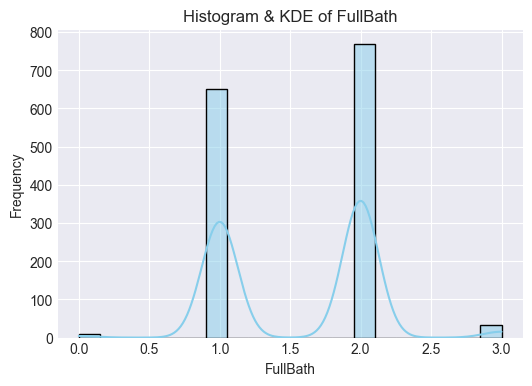

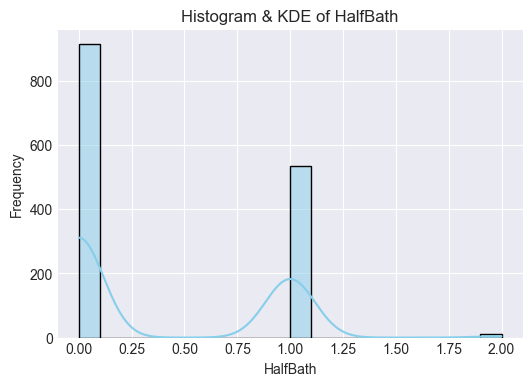

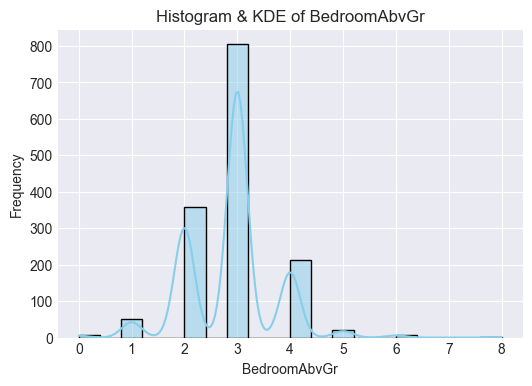

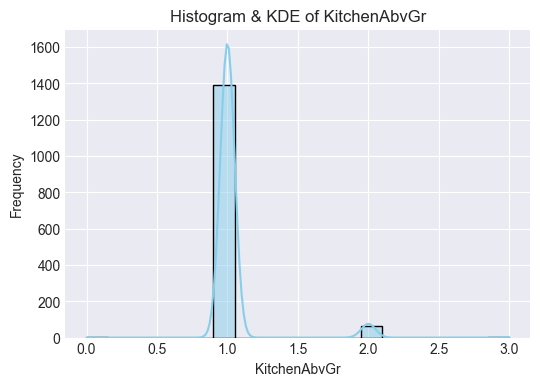

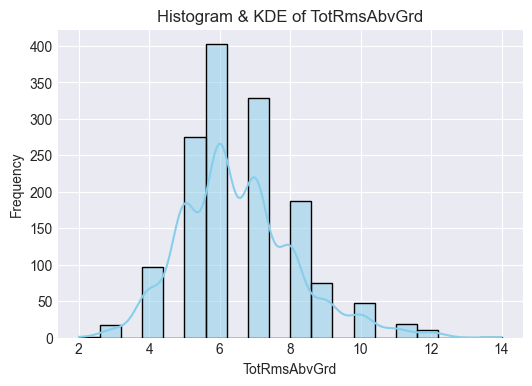

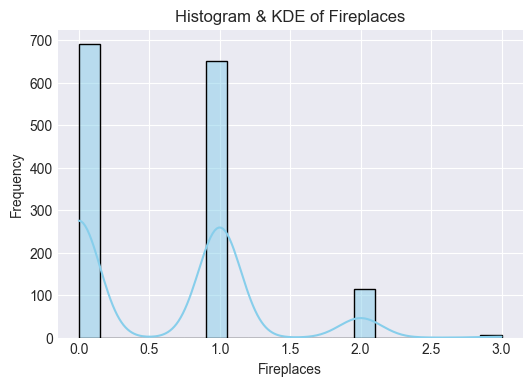

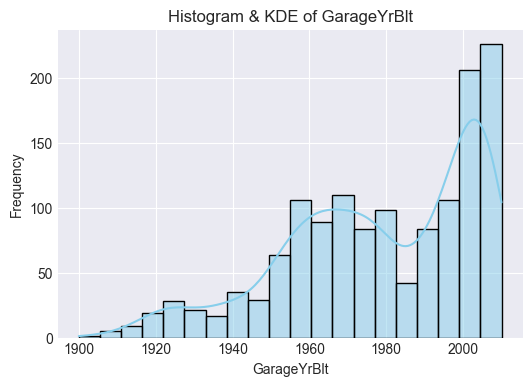

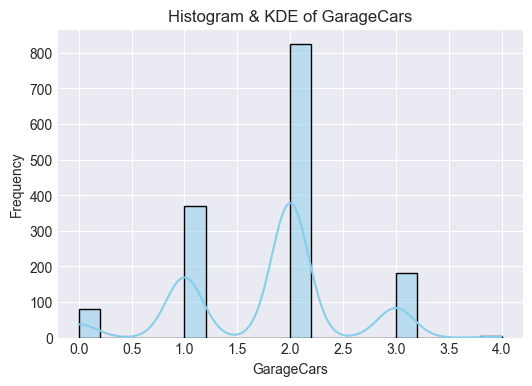

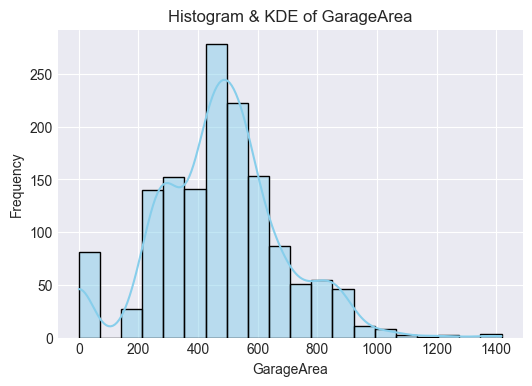

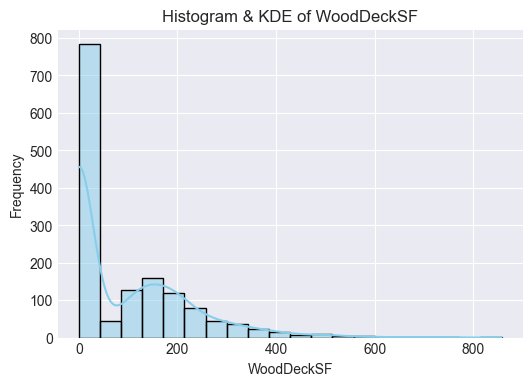

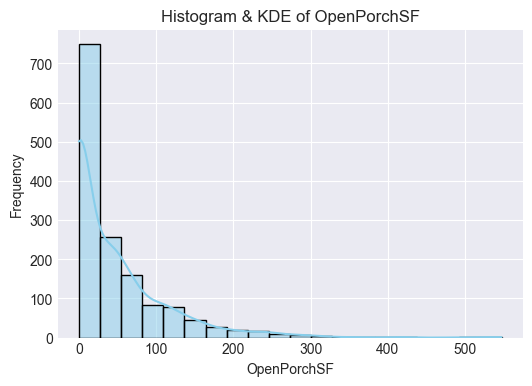

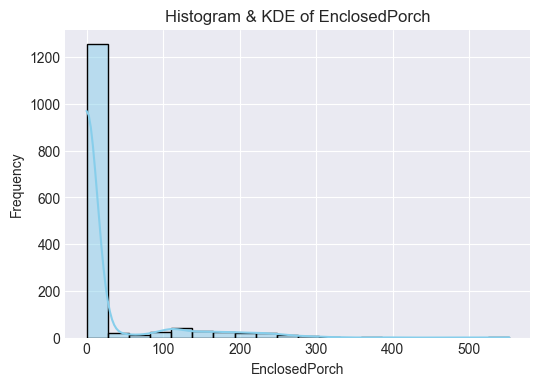

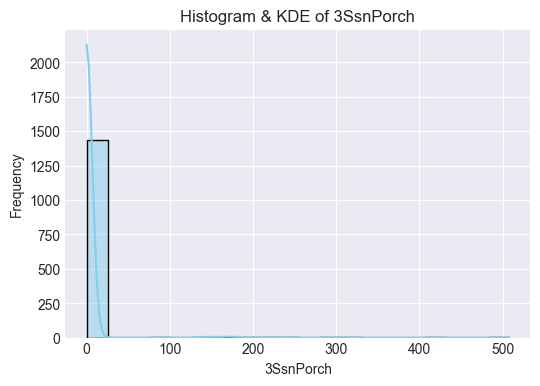

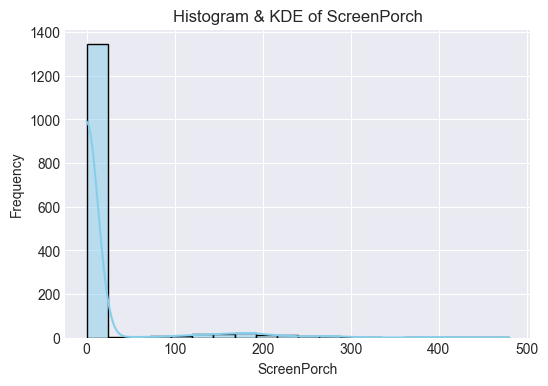

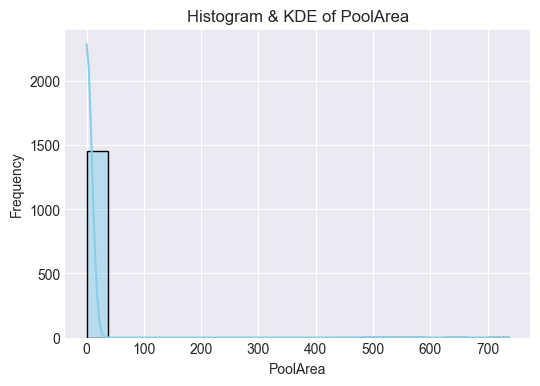

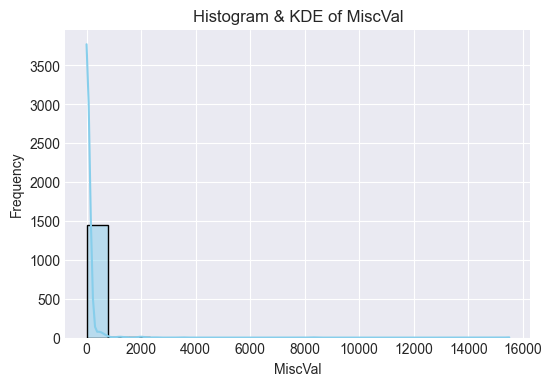

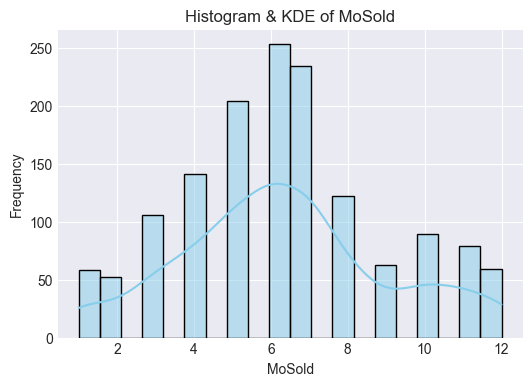

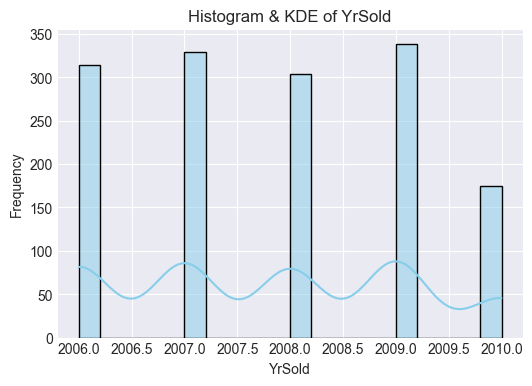

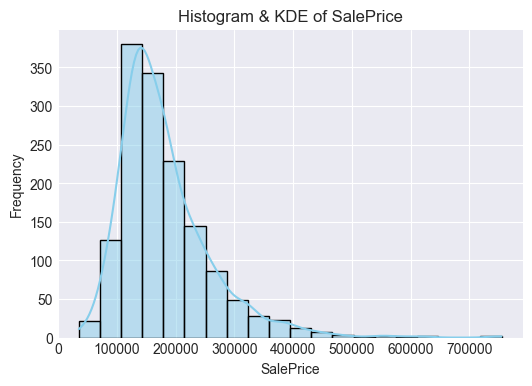

In [109]:
# UNIVARIATE VISUALISATION
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram & KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

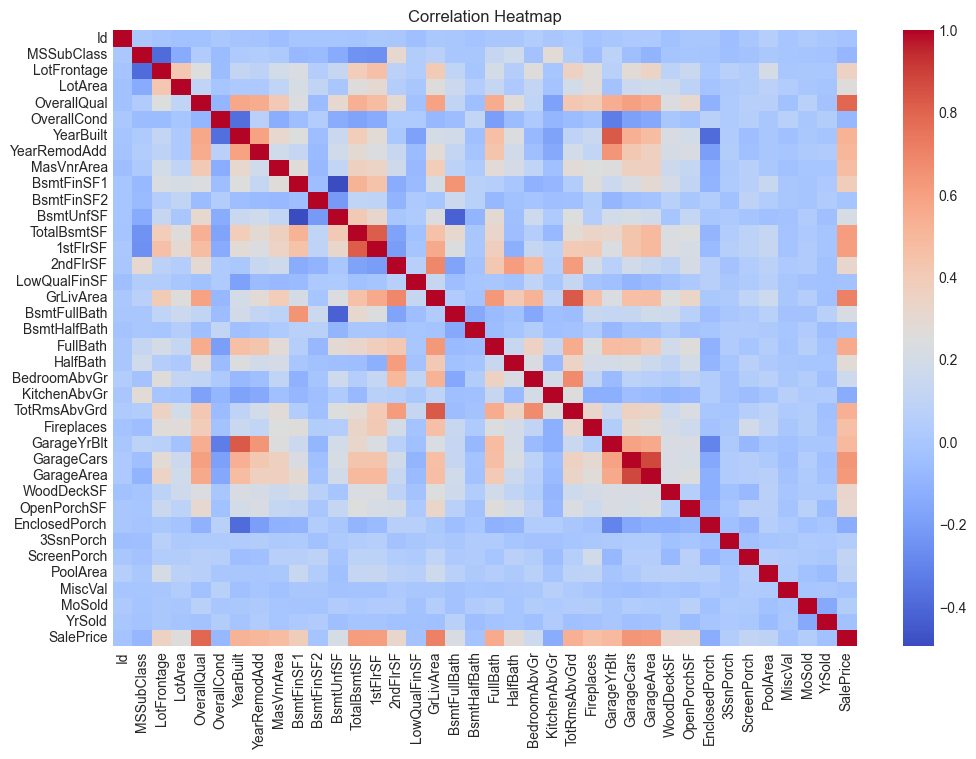

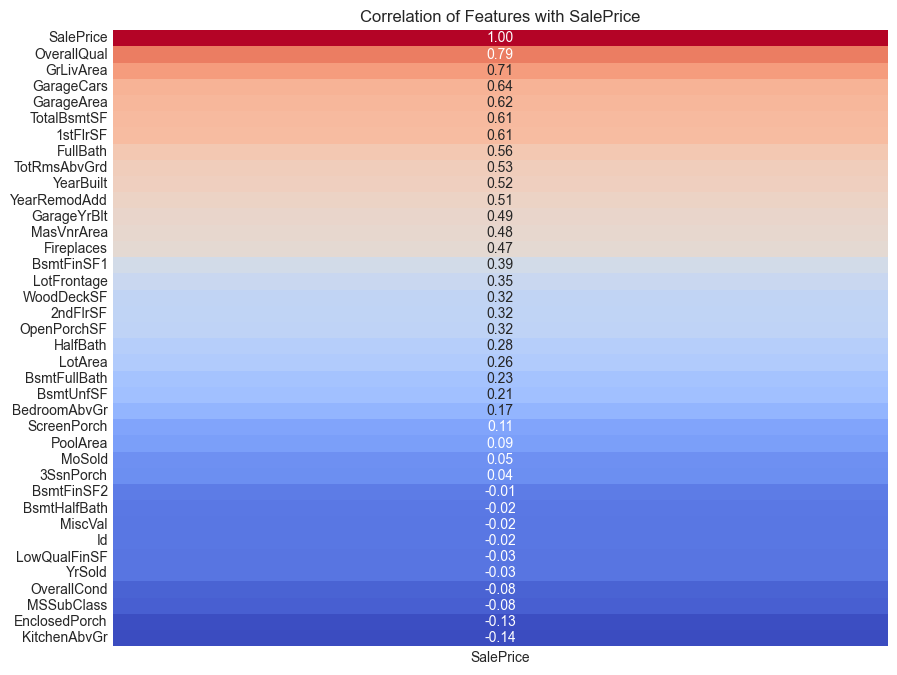

In [110]:
# Correlation heat map
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# --- Correlation Matrix With target---
num_cols = numeric_data.columns
target = 'SalePrice'
corr = data[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr[target].sort_values(ascending=False).to_frame(),
            annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("Correlation of Features with SalePrice")
plt.show()

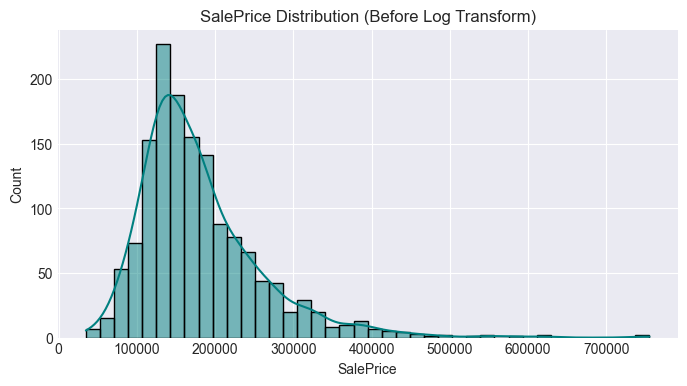

Skewness of SalePrice: 1.88


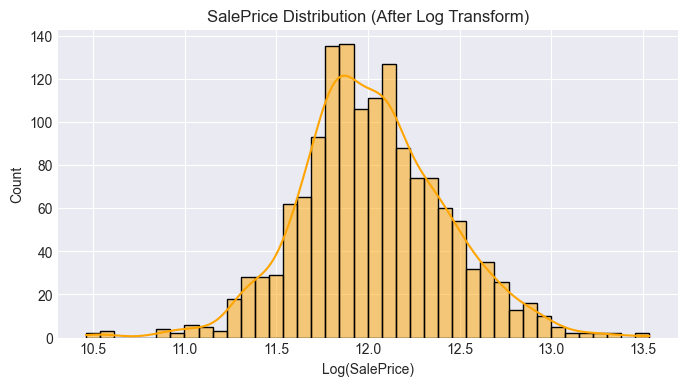

In [111]:
# --- Target Distribution (SalePrice) ---

plt.figure(figsize=(8,4))
sns.histplot(data[target], kde=True, bins=40, color='teal')
plt.title("SalePrice Distribution (Before Log Transform)")
plt.xlabel("SalePrice")
plt.show()

# Check skewness and log-transform if needed
skew_val = data[target].skew()
print(f"Skewness of {target}: {skew_val:.2f}")
if skew_val > 0.75:
    data['SalePrice_log'] = np.log1p(data[target])
    plt.figure(figsize=(8,4))
    sns.histplot(data['SalePrice_log'], kde=True, bins=40, color='orange')
    plt.title("SalePrice Distribution (After Log Transform)")
    plt.xlabel("Log(SalePrice)")
    plt.show()


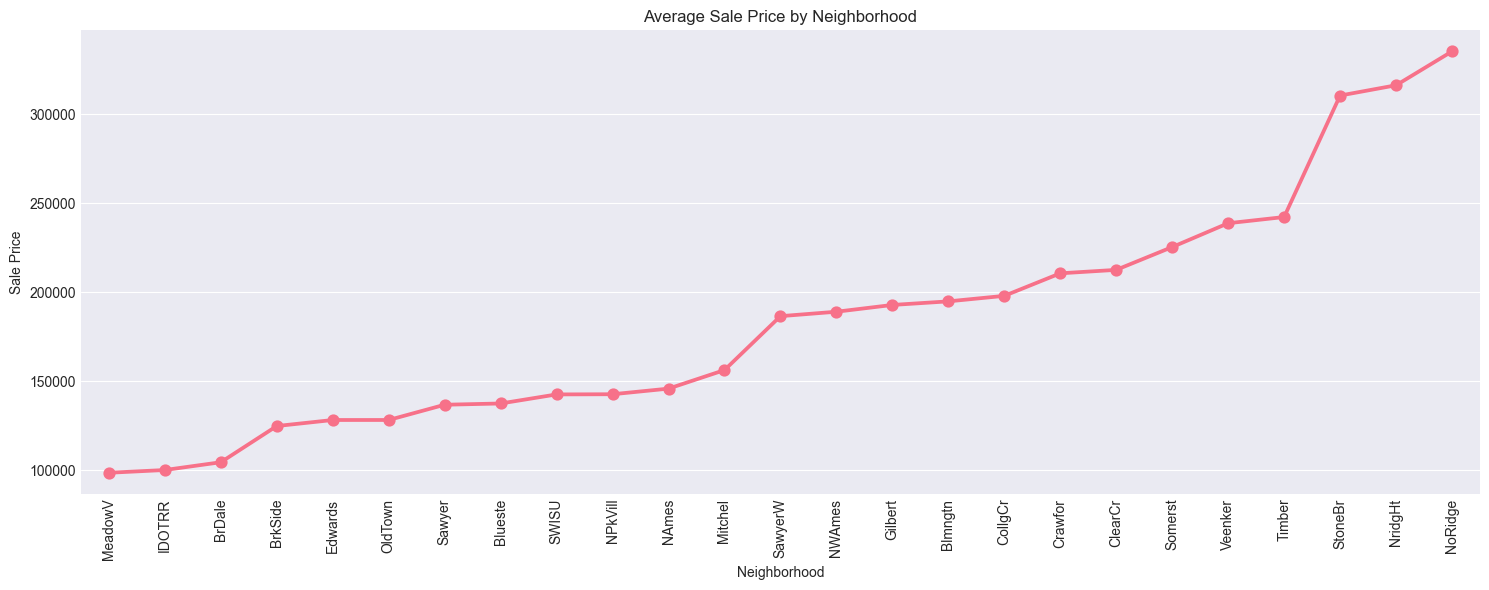

In [112]:
#BIVARIATE VISUALISATION

# Average price by Neighborhood
plt.figure(figsize=(15, 6))

# Compute mean sale price per neighborhood and sort
sorted_data = data.groupby('Neighborhood')['SalePrice'].mean().sort_values().reset_index()

# Use sorted data in the plot
sns.pointplot(x='Neighborhood', y='SalePrice', data=sorted_data, errorbar=None)

plt.xticks(rotation=90)
plt.title('Average Sale Price by Neighborhood')
plt.ylabel('Sale Price')
plt.xlabel('Neighborhood')
plt.tight_layout()
plt.show()

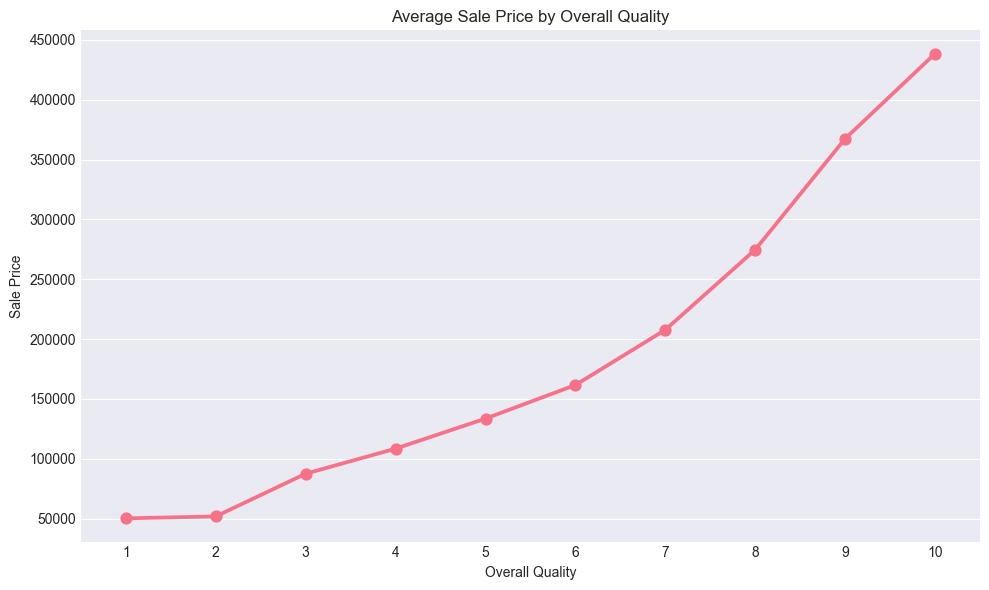

In [113]:
# Average price by Overall Quality
plt.figure(figsize=(10, 6))
sns.pointplot(x=data['OverallQual'], y=data['SalePrice'], errorbar=None)
plt.title('Average Sale Price by Overall Quality')
plt.ylabel('Sale Price')
plt.xlabel('Overall Quality')
plt.tight_layout()
plt.show()

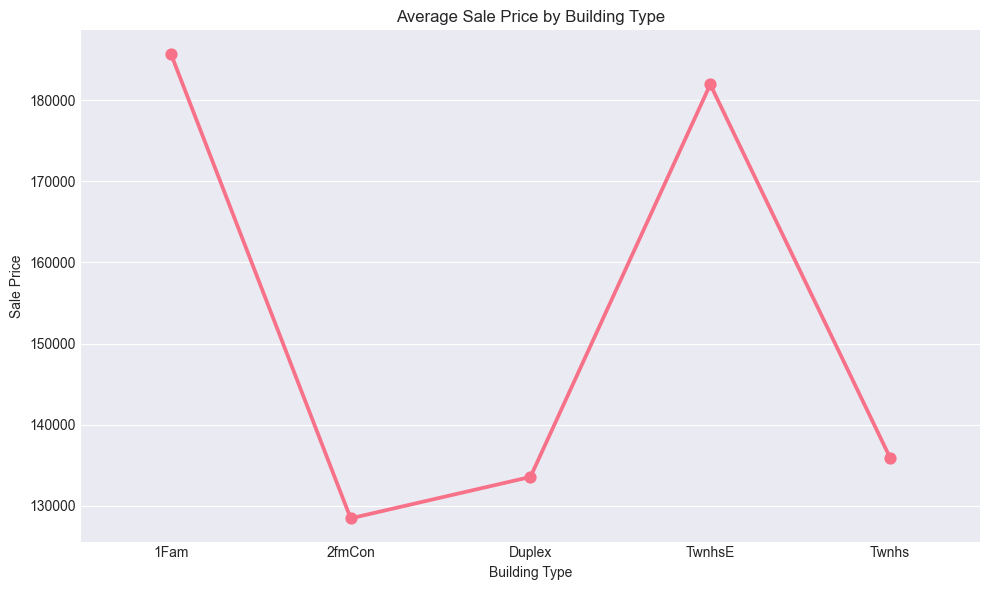

In [114]:
# Average price by Building Type
plt.figure(figsize=(10, 6))
sns.pointplot(x=data['BldgType'], y=data['SalePrice'], errorbar=None)
plt.title('Average Sale Price by Building Type')
plt.ylabel('Sale Price')
plt.xlabel('Building Type')
plt.tight_layout()
plt.show()

# **DATA CLEANING**

In [115]:
# Handle missing values
# First, let's identify columns with high missing percentages (>50%)
missing_pct = (data.isnull().sum() / len(data)) * 100
high_missing = missing_pct[missing_pct > 50].index.tolist()
print(f"Columns with >50% missing values: {high_missing}")

# Drop columns with high missing percentages and the Id column
columns_to_drop = ['Id'] + high_missing
datan = data.drop(columns=columns_to_drop, errors='ignore').copy()

# Handle missing values in remaining columns
# For numerical columns: impute with median
numeric_cols_with_missing = datan.select_dtypes(include=[np.number]).columns[datan.select_dtypes(include=[np.number]).isnull().any()].tolist()
for col in numeric_cols_with_missing:
    datan.loc[:, col] = datan[col].fillna(datan[col].median())

# For categorical columns: impute with mode or 'None' for meaningful features
categorical_cols_with_missing = datan.select_dtypes(include=['object']).columns[datan.select_dtypes(include=['object']).isnull().any()].tolist()
for col in categorical_cols_with_missing:
    # For features where 'None' is meaningful (e.g., no garage, no basement)
    if col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'FireplaceQu', 'Fence', 'MiscFeature']:
        datan.loc[:, col] = datan[col].fillna('None')
    else:
        datan.loc[:, col] = datan[col].fillna(datan[col].mode()[0])

print(f"\nShape after cleaning: {datan.shape}")
print(f"Remaining missing values: {datan.isnull().sum().sum()}")
datan.head()

Columns with >50% missing values: ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

Shape after cleaning: (1460, 76)
Remaining missing values: 0


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,12.317171
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849405
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,12.429220


MSSubClass: 103 outliers
LotFrontage: 106 outliers
LotArea: 69 outliers
OverallQual: 2 outliers
OverallCond: 125 outliers
YearBuilt: 7 outliers
MasVnrArea: 98 outliers
BsmtFinSF1: 7 outliers
BsmtFinSF2: 167 outliers
BsmtUnfSF: 29 outliers
TotalBsmtSF: 61 outliers
1stFlrSF: 20 outliers
2ndFlrSF: 2 outliers
LowQualFinSF: 26 outliers
GrLivArea: 31 outliers
BsmtFullBath: 1 outliers
BsmtHalfBath: 82 outliers
BedroomAbvGr: 35 outliers
KitchenAbvGr: 68 outliers
TotRmsAbvGrd: 30 outliers
Fireplaces: 5 outliers
GarageYrBlt: 1 outliers
GarageCars: 5 outliers
GarageArea: 21 outliers
WoodDeckSF: 32 outliers
OpenPorchSF: 77 outliers
EnclosedPorch: 208 outliers
3SsnPorch: 24 outliers
ScreenPorch: 116 outliers
PoolArea: 7 outliers
MiscVal: 52 outliers
SalePrice: 61 outliers
SalePrice_log: 28 outliers

Total columns checked: 38


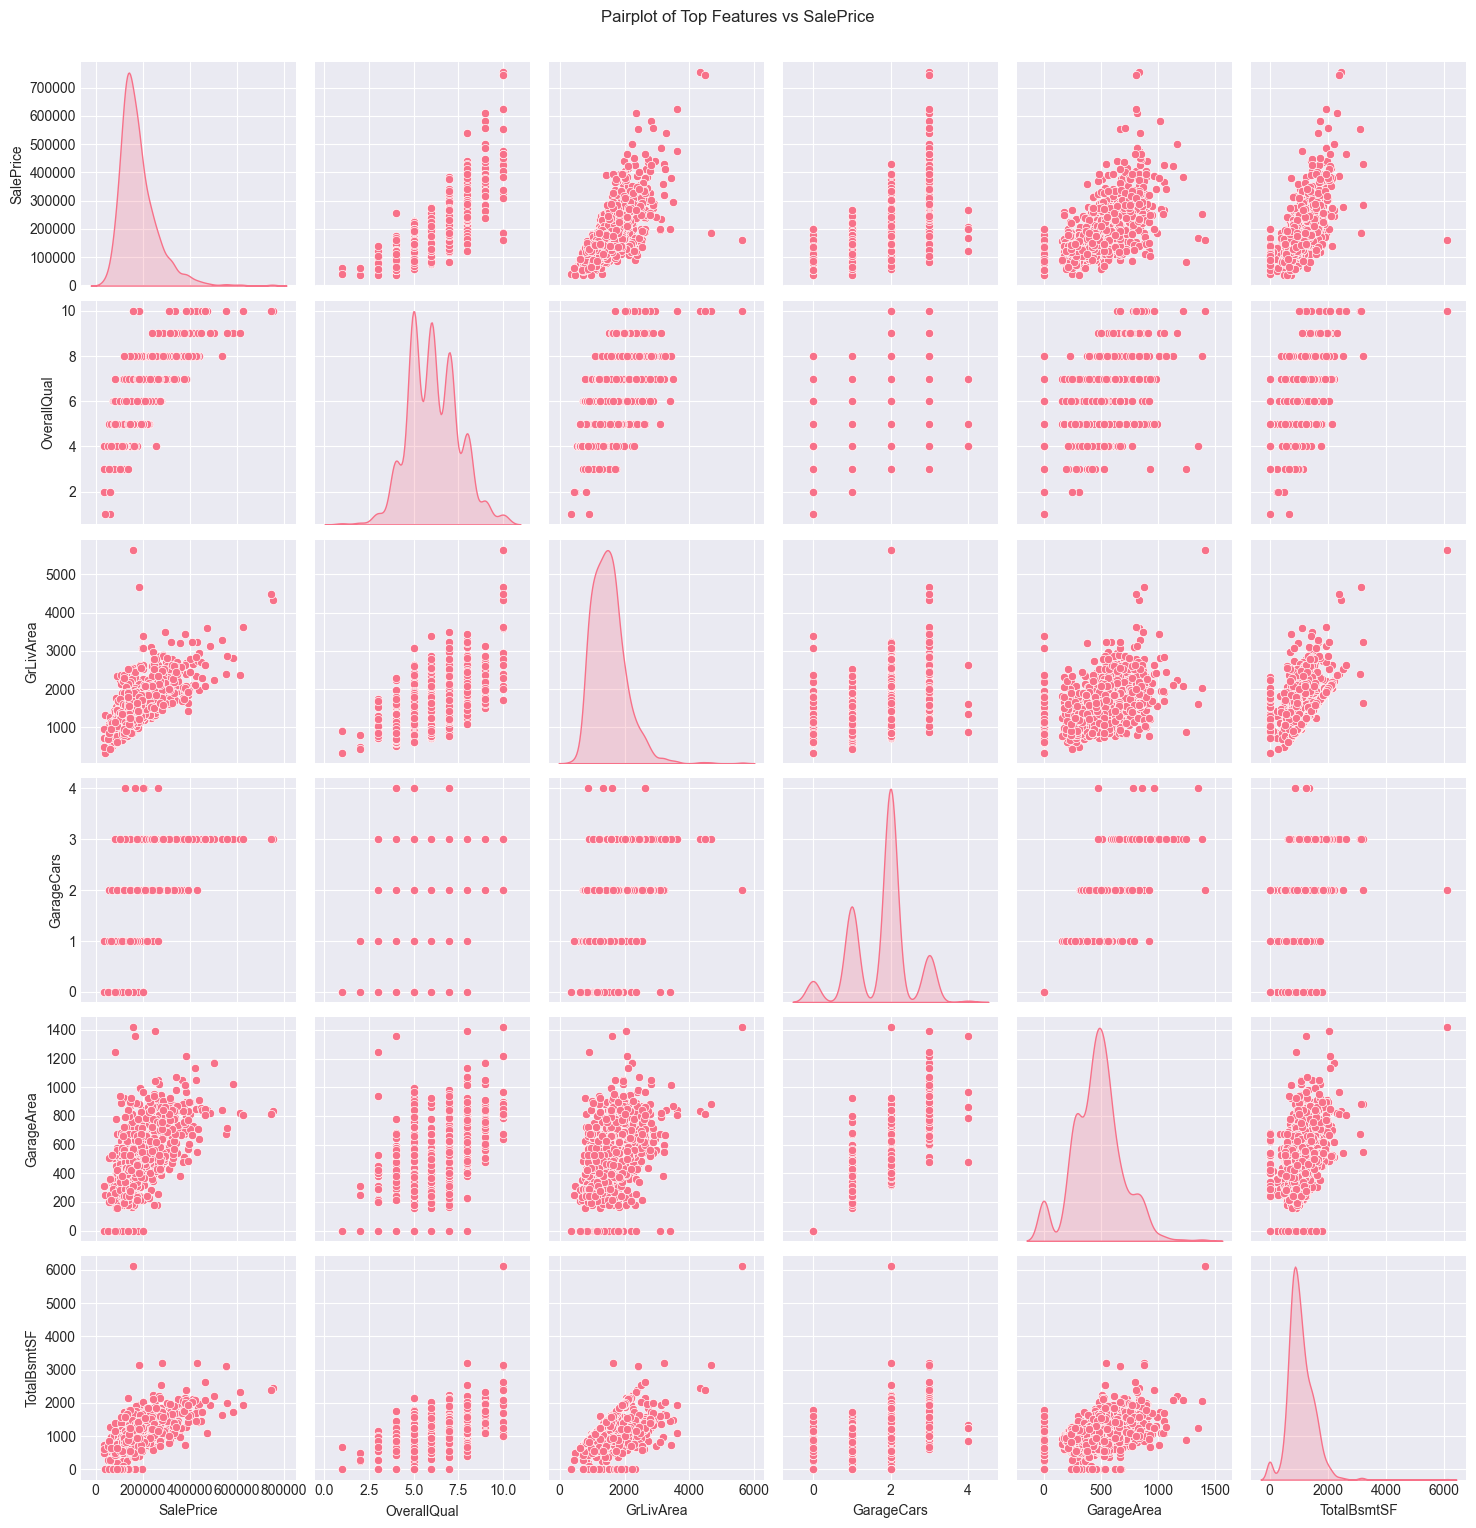

In [116]:
# OUTLIER DETECTION
numeric_col = datan.select_dtypes(include=['int64', 'float64']).columns
outlier_indices = {}

for col in numeric_col:
    Q1 = datan[col].quantile(0.25)
    Q3 = datan[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = datan[(datan[col] < lower_bound) | (datan[col] > upper_bound)]
    outlier_indices[col] = outliers.index.tolist()

    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers")

print(f"\nTotal columns checked: {len(numeric_col)}")

# --- Outlier Inspection ---
top_corr = corr[target].abs().sort_values(ascending=False).head(6).index
sns.pairplot(data[top_corr], diag_kind="kde")
plt.suptitle("Pairplot of Top Features vs SalePrice", y=1.02)
plt.show()

In [117]:
# ==========================================
# 🧮 Outlier Capping / Winsorization
# ==========================================
from scipy.stats.mstats import winsorize

# Identify numeric columns
numeric_cols = datan.select_dtypes(include=[np.number]).columns

# Apply Winsorization (limit at 1st–99th percentile)
for col in numeric_cols:
    lower, upper = datan[col].quantile([0.01, 0.99])
    datan[col] = np.clip(datan[col], lower, upper)

print("✅ Outliers capped at 1st–99th percentile for numeric columns.")


✅ Outliers capped at 1st–99th percentile for numeric columns.


# Note: Outliers found but not removing them as they may be legitimate high-value properties
# For house price prediction, extreme values can be real luxury homes

# **FEATURE ENGINEERING**

In [118]:
# CREATE NEW FEATURES FROM EXISTING COLUMNS

# 1. Total Square Footage
datan['TotalSF'] = datan['TotalBsmtSF'] + datan['1stFlrSF'] + datan['2ndFlrSF']

# 2. Property Age (from year sold)
datan['PropertyAge'] = datan['YrSold'] - datan['YearBuilt']

# 3. Years Since Remodel
datan['RemodAge'] = datan['YrSold'] - datan['YearRemodAdd']

# 4. Binary features - Has Garage
datan['HasGarage'] = (datan['GarageArea'] > 0).astype(int)

# 5. Binary features - Has Basement
datan['HasBasement'] = (datan['TotalBsmtSF'] > 0).astype(int)

# 6. Binary features - Has Fireplace
datan['HasFireplace'] = (datan['Fireplaces'] > 0).astype(int)

# 7. Binary features - Has 2nd Floor
datan['Has2ndFloor'] = (datan['2ndFlrSF'] > 0).astype(int)

# 8. Quality Score (interaction feature)
datan['QualityScore'] = datan['OverallQual'] * datan['OverallCond']

# 9. Total Bathrooms
datan['TotalBath'] = datan['FullBath'] + 0.5 * datan['HalfBath'] + datan['BsmtFullBath'] + 0.5 * datan['BsmtHalfBath']

# 10. Total Porch Area
datan['TotalPorchSF'] = datan['OpenPorchSF'] + datan['EnclosedPorch'] + datan['3SsnPorch'] + datan['ScreenPorch']

print("New features created:")
print("TotalSF, PropertyAge, RemodAge, HasGarage, HasBasement, HasFireplace,")
print("Has2ndFloor, QualityScore, TotalBath, TotalPorchSF")
print(f"\nUpdated shape: {datan.shape}")
datan[['TotalSF', 'PropertyAge', 'RemodAge', 'HasGarage', 'HasBasement', 'QualityScore', 'TotalBath']].head()

New features created:
TotalSF, PropertyAge, RemodAge, HasGarage, HasBasement, HasFireplace,
Has2ndFloor, QualityScore, TotalBath, TotalPorchSF

Updated shape: (1460, 86)


,TotalSF,PropertyAge,RemodAge,HasGarage,HasBasement,QualityScore,TotalBath
0,2566.0,5.0,5,1,1,35,3.5
1,2524.0,31.0,31,1,1,48,2.5
2,2706.0,7.0,6,1,1,35,3.5
3,2473.0,91.0,36,1,1,35,2.0
4,3343.0,8.0,8,1,1,40,3.5


In [119]:
# One-hot encode categorical variables
# Select only categorical columns
categorical_cols = datan.select_dtypes(include=['object']).columns.tolist()

# Limit to important categorical features to avoid too many dummy variables
important_categoricals = ['Neighborhood', 'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond',
                          'Foundation', 'HeatingQC', 'CentralAir', 'KitchenQual',
                          'GarageType', 'GarageFinish', 'PavedDrive', 'SaleCondition']

# Keep only those that exist in our data
categorical_to_encode = [col for col in important_categoricals if col in categorical_cols]

# Create dummy variables
datam = pd.get_dummies(datan, columns=categorical_to_encode, drop_first=True)

print(f"Shape after one-hot encoding: {datam.shape}")
print(f"Encoded categorical columns: {categorical_to_encode}")
datam.head()

Shape after one-hot encoding: (1460, 144)
Encoded categorical columns: ['Neighborhood', 'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleCondition']


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,True,False,False,True,False,False,False,True,False
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,False,True,False,False,True,False,False,False,True,False
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,False,True,False,False,True,False,False,False,True,False
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,False,False,True,False,True,False,False,False,False,False
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,False,True,False,False,True,False,False,False,True,False


In [120]:
datam.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,True,False,False,True,False,False,False,True,False
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,False,True,False,False,True,False,False,False,True,False
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,False,True,False,False,True,False,False,False,True,False
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,False,False,True,False,True,False,False,False,False,False
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,False,True,False,False,True,False,False,False,True,False


In [121]:
# Using LabelEncoder to transform remaining categorical variables to numeric variables

from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = datam.drop(columns=['SalePrice', 'SalePrice_log'], axis=1)
y = datam['SalePrice']

# Find remaining categorical columns (those not one-hot encoded)
cat_f = X.select_dtypes(include='object').columns
print(f"Remaining categorical columns to encode: {list(cat_f)}")

# Encode remaining categorical features
X_encoded = X.copy()
label_encoders = {}
for col in cat_f:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

print(f"\nFinal feature shape: {X_encoded.shape}")
print(f"Target variable shape: {y.shape}")
X_encoded.head()

Remaining categorical columns to encode: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'SaleType']

Final feature shape: (1460, 142)
Target variable shape: (1460,)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,3,65.0,8450.0,1,3,3,0,4,0,...,False,True,False,False,True,False,False,False,True,False
1,20,3,80.0,9600.0,1,3,3,0,2,0,...,False,True,False,False,True,False,False,False,True,False
2,60,3,68.0,11250.0,1,0,3,0,4,0,...,False,True,False,False,True,False,False,False,True,False
3,70,3,60.0,9550.0,1,0,3,0,0,0,...,False,False,True,False,True,False,False,False,False,False
4,60,3,84.0,14260.0,1,0,3,0,2,0,...,False,True,False,False,True,False,False,False,True,False


In [122]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Calculate mutual information scores for all features
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X_encoded, y)

mi_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'MI Score': selector.scores_
}).sort_values(by='MI Score', ascending=False)

print("Top 20 Features by Mutual Information Score:")
print(mi_scores.head(20))

Top 20 Features by Mutual Information Score:
            Feature  MI Score
61          TotalSF  0.678156
12      OverallQual  0.581348
35        GrLivArea  0.478044
68     QualityScore  0.448848
29      TotalBsmtSF  0.372837
48       GarageArea  0.372725
14        YearBuilt  0.371248
47       GarageCars  0.360211
62      PropertyAge  0.346666
21         BsmtQual  0.335896
69        TotalBath  0.332058
32         1stFlrSF  0.311443
46      GarageYrBlt  0.307747
0        MSSubClass  0.275719
63         RemodAge  0.264623
38         FullBath  0.259113
108    ExterQual_TA  0.251444
15     YearRemodAdd  0.249170
125  KitchenQual_TA  0.224361
107    ExterQual_Gd  0.223513


In [123]:
from sklearn.feature_selection import f_regression

# Apply f_regression
f_selector = SelectKBest(score_func=f_regression, k='all')
f_selector.fit(X_encoded, y)

# Collect scores
f_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'F_Score': f_selector.scores_,
    'p_value': f_selector.pvalues_
}).sort_values(by='F_Score', ascending=False)

print("Top 20 Features by F-Score (Linear Relation with SalePrice):")
print(f_scores.head(20))

Top 20 Features by F-Score (Linear Relation with SalePrice):
              Feature      F_Score        p_value
61            TotalSF  3016.894195   0.000000e+00
12        OverallQual  2781.015721   0.000000e+00
35          GrLivArea  1584.494612  3.681976e-235
47         GarageCars  1160.316191  1.372357e-187
48         GarageArea  1058.084440  5.731072e-175
69          TotalBath  1051.548353  3.824058e-174
29        TotalBsmtSF  1049.422880  7.096414e-174
32           1stFlrSF   948.790642  6.797806e-161
108      ExterQual_TA   874.930548  5.143659e-151
21           BsmtQual   845.895488  4.796464e-147
68       QualityScore   733.883653  3.021845e-131
38           FullBath   733.784067  3.123751e-131
62        PropertyAge   638.905536  3.354464e-117
14          YearBuilt   637.335379  5.796311e-117
125    KitchenQual_TA   604.334852  6.269094e-112
42       TotRmsAbvGrd   598.819427  4.430431e-111
63           RemodAge   573.647144  3.561830e-107
15       YearRemodAdd   567.573000  3.1

Top 20 Features by Random Forest Importance:
TotalSF                 0.464340
OverallQual             0.318256
QualityScore            0.026020
YearBuilt               0.018375
LotArea                 0.012195
PropertyAge             0.011211
BsmtFinSF1              0.009091
TotalBath               0.008743
GrLivArea               0.008433
GarageArea              0.008406
GarageCars              0.008218
BsmtQual                0.007922
BsmtUnfSF               0.006738
LotFrontage             0.005741
RemodAge                0.005634
YearRemodAdd            0.004894
LandContour             0.003460
2ndFlrSF                0.003306
1stFlrSF                0.003227
TotalPorchSF            0.002974
OpenPorchSF             0.002949
GarageYrBlt             0.002940
TotalBsmtSF             0.002858
MoSold                  0.002836
KitchenQual_Gd          0.002620
Neighborhood_Edwards    0.002509
WoodDeckSF              0.002467
MasVnrArea              0.002382
OverallCond             0.00187

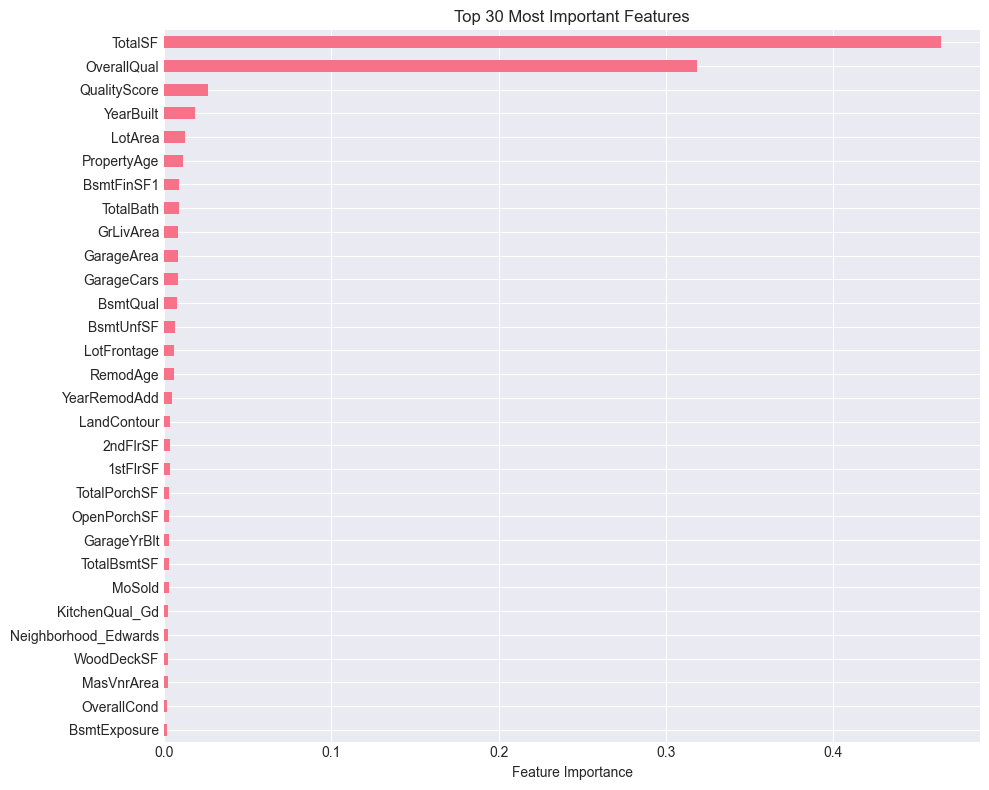

In [124]:
# Train Random Forest model to get feature importance
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_encoded, y)

# Get feature importance
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
top_features = importances.sort_values(ascending=False).head(30)

print("Top 20 Features by Random Forest Importance:")
print(top_features)

# Visualize top features
plt.figure(figsize=(10, 8))
top_features.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 30 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [125]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import pandas as pd

# --- Target choices ---
targets = {
    "SalePrice": datan["SalePrice"],
    "SalePrice_log": datan["SalePrice_log"]
}

# --- Loop through both targets ---
results = {}

for name, y in targets.items():
    f_selector = SelectKBest(score_func=f_regression, k='all')
    f_selector.fit(X_encoded, y)

    f_scores = pd.DataFrame({
        'Feature': X_encoded.columns,
        'F_Score': f_selector.scores_,
        'p_value': f_selector.pvalues_
    }).sort_values(by='F_Score', ascending=False)

    mi_scores = pd.Series(mutual_info_regression(X_encoded, y, random_state=42),
                          index=X_encoded.columns, name='MI_Score').sort_values(ascending=False)

    results[name] = (f_scores, mi_scores)

# --- Compare top 10 for both targets ---
print("Top F-test features for SalePrice_log:")
print(results["SalePrice_log"][0].head(10))

print("\nTop Mutual Information features for SalePrice_log:")
print(results["SalePrice_log"][1].head(10))

print("\nTop F-test features for SalePrice (raw):")
print(results["SalePrice"][0].head(10))


Top F-test features for SalePrice_log:
          Feature      F_Score        p_value
61        TotalSF  2982.628326   0.000000e+00
12    OverallQual  2934.708792   0.000000e+00
35      GrLivArea  1556.208807  3.350700e-232
47     GarageCars  1324.044421  8.293271e-207
69      TotalBath  1233.779067  2.341753e-196
48     GarageArea  1144.896414  1.021222e-185
29    TotalBsmtSF  1040.129188  1.066135e-172
32       1stFlrSF   888.106146  8.437895e-153
108  ExterQual_TA   853.851351  3.874651e-148
38       FullBath   841.701618  1.813209e-146

Top Mutual Information features for SalePrice_log:
TotalSF         0.683332
OverallQual     0.571558
GrLivArea       0.463590
QualityScore    0.453042
GarageArea      0.371915
YearBuilt       0.370918
TotalBsmtSF     0.366724
GarageCars      0.365364
TotalBath       0.343462
PropertyAge     0.330852
Name: MI_Score, dtype: float64

Top F-test features for SalePrice (raw):
          Feature      F_Score        p_value
61        TotalSF  3016.894195   0

In [126]:
# --- Combine F-test and Mutual Information top 30 ---
top_f = f_scores.head(30)['Feature'].tolist()
top_mi = mi_scores.head(30).index.tolist()

# Combine both sets (union)
filter_top30 = list(set(top_f) | set(top_mi))
print(f"Total unique top features from filters: {len(filter_top30)}")

X_filter = X_encoded[filter_top30]
y_log = datam['SalePrice_log']

Total unique top features from filters: 35


[RFECV] Optimal #features: 23
Selected features: ['MSSubClass', 'GarageYrBlt', 'PropertyAge', '2ndFlrSF', 'TotalSF', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'BsmtFinSF1', 'LotArea', 'LotFrontage', 'YearBuilt', 'QualityScore', 'GarageType_Detchd', 'TotalBath', 'Fireplaces', 'OverallQual', 'BsmtQual', 'Exterior2nd', 'RemodAge', 'GrLivArea', 'YearRemodAdd', 'GarageArea']
[RFECV] Hold-out R²: 0.8965 | MAE: 0.092


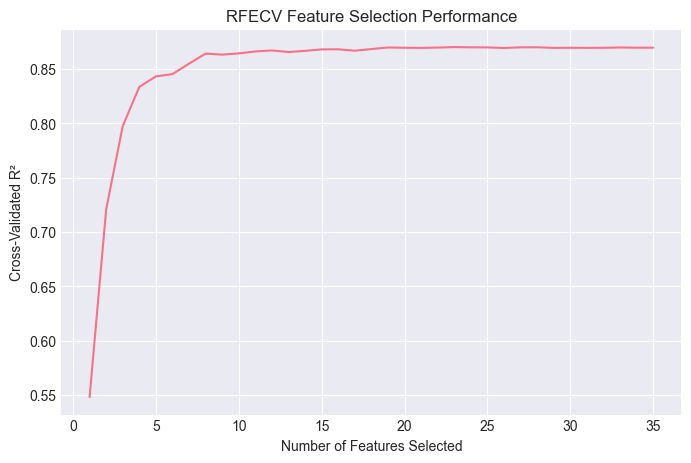

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_absolute_error

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_filter,  # from filter-based selection (top 30)
    datan["SalePrice_log"],  # target (use log version)
    test_size=0.2,
    random_state=42
)

# --- Random Forest Regressor ---
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

# --- Cross-validation setup ---
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# --- RFECV setup ---
rfecv = RFECV(
    estimator=rf,
    step=1,         # remove one feature per iteration
    cv=cv,
    scoring="r2",   # use R² for scoring
    n_jobs=-1
)

# --- Fit the selector ---
rfecv.fit(X_train, y_train)

# --- Get selected features ---
selected_rfecv = X_filter.columns[rfecv.support_].tolist()
print(f"[RFECV] Optimal #features: {rfecv.n_features_}")
print("Selected features:", selected_rfecv)

# --- Evaluate performance on hold-out set ---
rf.fit(X_train[selected_rfecv], y_train)
pred = rf.predict(X_test[selected_rfecv])

r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
print(f"[RFECV] Hold-out R²: {r2:.4f} | MAE: {mae:.3f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated R²")
plt.title("RFECV Feature Selection Performance")
plt.show()

[LASSO] Selected 23 features
GrLivArea           0.117998
QualityScore        0.083220
PropertyAge        -0.073363
TotalBsmtSF         0.041493
GarageCars          0.035698
BsmtFinSF1          0.031038
Fireplaces          0.029686
Foundation_PConc    0.025258
TotalBath           0.020471
LotArea             0.019866
MSSubClass         -0.019352
RemodAge           -0.016621
BsmtQual           -0.014914
OverallQual         0.013929
GarageArea          0.012182
dtype: float64
[LASSO] Hold-out R²: 0.8977 | MAE: 0.0973


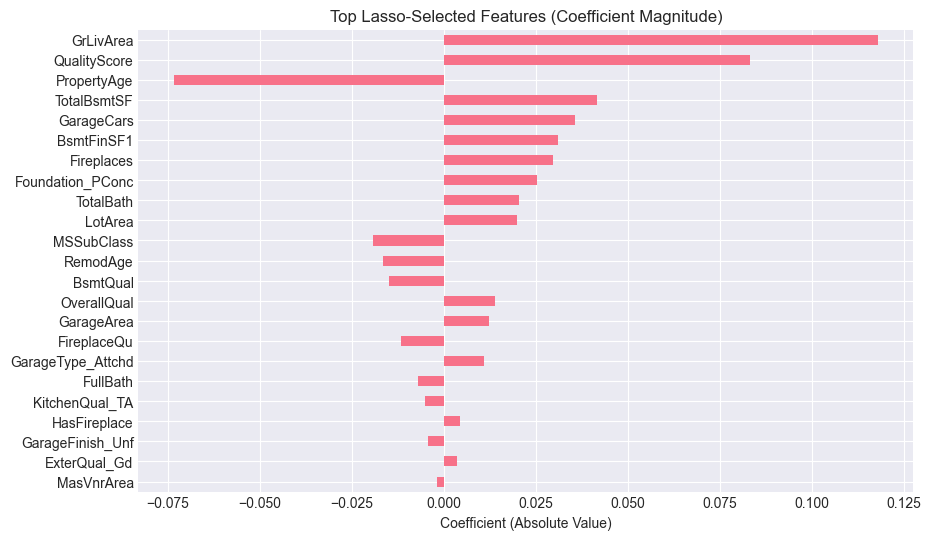

In [128]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# --- Train-test split (reuse previous or recreate) ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_filter,              # top features from filter stage
    datan["SalePrice_log"],  # target
    test_size=0.2,
    random_state=42
)

# --- Build pipeline: scaling + Lasso with cross-validation ---
lasso_pipe = make_pipeline(
    StandardScaler(),
    LassoCV(cv=5, random_state=42, n_jobs=-1)
)

# --- Fit model ---
lasso_pipe.fit(X_train, y_train)

# --- Retrieve coefficients ---
lasso = lasso_pipe.named_steps["lassocv"]
coef_series = pd.Series(lasso.coef_, index=X_filter.columns)

# --- Non-zero coefficients (selected features) ---
lasso_selected = coef_series[coef_series != 0].sort_values(key=abs, ascending=False)
print(f"[LASSO] Selected {len(lasso_selected)} features")
print(lasso_selected.head(15))

# --- Evaluate performance ---
y_pred = lasso_pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"[LASSO] Hold-out R²: {r2:.4f} | MAE: {mae:.4f}")

plt.figure(figsize=(10,6))
lasso_selected.head(30).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top Lasso-Selected Features (Coefficient Magnitude)")
plt.xlabel("Coefficient (Absolute Value)")
plt.show()



In [129]:
# --- Combine all unique features ---
combined_features = set(filter_top30) | set(selected_rfecv) | set(lasso_selected.index)
common_features = set(filter_top30) & set(selected_rfecv) & set(lasso_selected.index)

print(f"Total unique selected features: {len(combined_features)}")
print(f"Highly consistent across all methods: {len(common_features)}")

print("\nCommon features across ALL methods:")
print(list(common_features))


Total unique selected features: 35
Highly consistent across all methods: 14

Common features across ALL methods:
['MSSubClass', 'GarageCars', 'OverallQual', 'BsmtQual', 'PropertyAge', 'BsmtFinSF1', 'RemodAge', 'QualityScore', 'GrLivArea', 'TotalBsmtSF', 'TotalBath', 'GarageArea', 'Fireplaces', 'LotArea']


In [130]:
X_final = X_encoded[list(combined_features)]
y_final = datan["SalePrice_log"]

print("Final dataset shape:", X_final.shape)


Final dataset shape: (1460, 35)


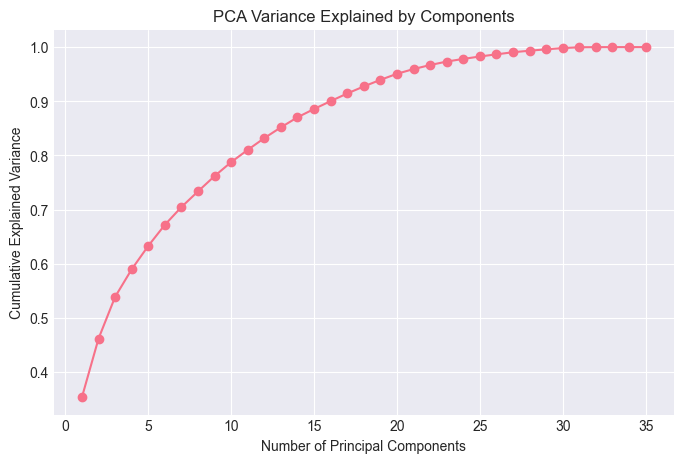

In [131]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# --- Scale the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# --- Apply PCA ---
pca = PCA(n_components=None, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# --- Explained variance ratio ---
explained_var = np.cumsum(pca.explained_variance_ratio_)

# --- Plot how much variance is explained ---
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained by Components')
plt.grid(True)
plt.show()


In [132]:
n_components_95 = np.argmax(explained_var >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")
# Reducing data
pca_final = PCA(n_components=n_components_95, random_state=42)
X_reduced = pca_final.fit_transform(X_scaled)

print("Reduced shape:", X_reduced.shape)


Number of components to retain 95% variance: 20
Reduced shape: (1460, 20)


In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y_final, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
print(f"[PCA Reduced Model] R²: {r2:.4f} | MAE: {mae:.4f}")


[PCA Reduced Model] R²: 0.8992 | MAE: 0.0930


# **STEP 8: MODEL CONSTRUCTION**


In [134]:
# Prepare data for model construction
# Use the final selected features (X_final) and log-transformed target (y_final)
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

# Also get the original SalePrice for interpretation
y_train_orig = datan.loc[X_train.index, 'SalePrice']
y_test_orig = datan.loc[X_test.index, 'SalePrice']

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"\nTraining target (log) range: {y_train_log.min():.2f} to {y_train_log.max():.2f}")
print(f"Test target (log) range: {y_test_log.min():.2f} to {y_test_log.max():.2f}")


Training set shape: (1168, 35)
Test set shape: (292, 35)

Training target (log) range: 11.03 to 13.00
Test target (log) range: 11.03 to 13.00


## 8.1 Simple Linear Regression

Build a simple linear regression model using the single most important feature (OverallQual based on feature selection results).


In [135]:
from sklearn.linear_model import LinearRegression

# Select the most important single feature (OverallQual)
# Based on feature selection, OverallQual is one of the top features
single_feature = 'OverallQual'
X_train_simple = X_train[[single_feature]]
X_test_simple = X_test[[single_feature]]

# Build Simple Linear Regression model
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train_log)

# Make predictions
y_pred_simple_log = simple_lr.predict(X_test_simple)

# Convert predictions back to original scale (inverse log transform)
y_pred_simple = np.expm1(y_pred_simple_log)

print("Simple Linear Regression Model")
print("=" * 50)
print(f"Feature used: {single_feature}")
print(f"Coefficient: {simple_lr.coef_[0]:.4f}")
print(f"Intercept: {simple_lr.intercept_:.4f}")
print(f"\nModel equation: log(SalePrice) = {simple_lr.intercept_:.4f} + {simple_lr.coef_[0]:.4f} * {single_feature}")


Simple Linear Regression Model
Feature used: OverallQual
Coefficient: 0.2265
Intercept: 10.6433

Model equation: log(SalePrice) = 10.6433 + 0.2265 * OverallQual


## 8.2 Gradient Boosting

Build a Gradient Boosting Regressor model using the selected features.


In [136]:
from sklearn.ensemble import GradientBoostingRegressor

# Build Gradient Boosting Regressor model
# Using log-transformed target for better performance
gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    subsample=0.8,
    random_state=42,
    verbose=0
)

# Fit the model
gb_model.fit(X_train, y_train_log)

# Make predictions
y_pred_gb_log = gb_model.predict(X_test)

# Convert predictions back to original scale (inverse log transform)
y_pred_gb = np.expm1(y_pred_gb_log)

print("Gradient Boosting Regressor Model")
print("=" * 50)
print(f"Number of features used: {len(X_train.columns)}")
print(f"Number of estimators: {gb_model.n_estimators}")
print(f"Learning rate: {gb_model.learning_rate}")
print(f"Max depth: {gb_model.max_depth}")

# Feature importance
feature_importance_gb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(f"\nTop 10 most important features:")
print(feature_importance_gb.head(10).to_string(index=False))


Gradient Boosting Regressor Model
Number of features used: 35
Number of estimators: 200
Learning rate: 0.05
Max depth: 5

Top 10 most important features:
     Feature  Importance
 OverallQual    0.377547
     TotalSF    0.338155
QualityScore    0.048748
     LotArea    0.023369
   TotalBath    0.022381
 PropertyAge    0.020454
  GarageCars    0.019668
   GrLivArea    0.019275
   YearBuilt    0.015893
  BsmtFinSF1    0.015404


## 8.3 LightGBM

Build a LightGBM Regressor model using the selected features.


In [137]:
try:
    import lightgbm as lgb

    # Build LightGBM Regressor model
    # Using log-transformed target for better performance
    lgb_model = lgb.LGBMRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1
    )

    # Fit the model
    lgb_model.fit(X_train, y_train_log)

    # Make predictions
    y_pred_lgb_log = lgb_model.predict(X_test)

    # Convert predictions back to original scale (inverse log transform)
    y_pred_lgb = np.expm1(y_pred_lgb_log)

    print("LightGBM Regressor Model")
    print("=" * 50)
    print(f"Number of features used: {len(X_train.columns)}")
    print(f"Number of estimators: {lgb_model.n_estimators}")
    print(f"Learning rate: {lgb_model.learning_rate}")
    print(f"Max depth: {lgb_model.max_depth}")

    # Feature importance
    feature_importance_lgb = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': lgb_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print(f"\nTop 10 most important features:")
    print(feature_importance_lgb.head(10).to_string(index=False))

except (ImportError, OSError) as e:
    print("LightGBM could not be loaded. This may be due to missing system dependencies (libomp).")
    print("To fix this, install libomp: brew install libomp (on macOS)")
    print("\nNote: LightGBM model will be skipped.")
    # Use Gradient Boosting predictions as fallback if available
    try:
        y_pred_lgb = y_pred_gb.copy()
        y_pred_lgb_log = y_pred_gb_log.copy()
        print("Using Gradient Boosting predictions as fallback.")
    except NameError:
        print("Warning: Gradient Boosting model not found. Please run the Gradient Boosting cell first.")
        # Create dummy predictions to prevent errors downstream
        y_pred_lgb_log = y_test_log.copy()  # Use actual values as placeholder
        y_pred_lgb = y_test_orig.copy()


LightGBM Regressor Model
Number of features used: 35
Number of estimators: 200
Learning rate: 0.05
Max depth: 5

Top 10 most important features:
     Feature  Importance
     LotArea         297
     TotalSF         222
  GarageArea         207
QualityScore         178
  BsmtFinSF1         171
    1stFlrSF         131
 LotFrontage         121
   GrLivArea         118
 PropertyAge         104
 GarageYrBlt          99


## 8.2 Multiple Linear Regression

Build a multiple linear regression model using top selected features from feature selection phase.


In [138]:
# Build Multiple Linear Regression model using all selected features
# Scale features for better model performance
scaler_mlr = StandardScaler()
X_train_scaled = scaler_mlr.fit_transform(X_train)
X_test_scaled = scaler_mlr.transform(X_test)

# Build Multiple Linear Regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_scaled, y_train_log)

# Make predictions
y_pred_multiple_log = multiple_lr.predict(X_test_scaled)

# Convert predictions back to original scale (inverse log transform)
y_pred_multiple = np.expm1(y_pred_multiple_log)

print("Multiple Linear Regression Model")
print("=" * 50)
print(f"Number of features used: {len(X_train.columns)}")
print(f"Intercept: {multiple_lr.intercept_:.4f}")
print(f"\nTop 10 feature coefficients:")
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': multiple_lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10).to_string(index=False))


Multiple Linear Regression Model
Number of features used: 35
Intercept: 12.0309

Top 10 feature coefficients:
     Feature  Coefficient
   GrLivArea     0.189708
QualityScore     0.085847
 PropertyAge    -0.058807
 TotalBsmtSF     0.054238
    2ndFlrSF    -0.047435
    1stFlrSF    -0.044108
  GarageCars     0.035287
    RemodAge    -0.035172
  Fireplaces     0.029511
  BsmtFinSF1     0.029046


# **STEP 9: MODEL EVALUATION**


In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    """Calculate RMSE, MAE, and R² metrics"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Evaluation Metrics")
    print("=" * 50)
    print(f"RMSE (Root Mean Squared Error): ${rmse:,.2f}")
    print(f"MAE (Mean Absolute Error): ${mae:,.2f}")
    print(f"R² (Coefficient of Determination): {r2:.4f}")
    print(f"\nInterpretation:")
    print(f"- RMSE: On average, predictions are off by ${rmse:,.2f}")
    print(f"- MAE: The average absolute error is ${mae:,.2f}")
    print(f"- R²: The model explains {r2*100:.2f}% of the variance in SalePrice")

    return {'RMSE': rmse, 'MAE': mae, 'R²': r2}

# Evaluate Simple Linear Regression
metrics_simple = evaluate_model(y_test_orig, y_pred_simple, "Simple Linear Regression")

# Evaluate Multiple Linear Regression
metrics_multiple = evaluate_model(y_test_orig, y_pred_multiple, "Multiple Linear Regression")

# Evaluate Gradient Boosting
metrics_gb = evaluate_model(y_test_orig, y_pred_gb, "Gradient Boosting")

# Evaluate LightGBM
metrics_lgb = evaluate_model(y_test_orig, y_pred_lgb, "LightGBM")



Simple Linear Regression Evaluation Metrics
RMSE (Root Mean Squared Error): $39,010.21
MAE (Mean Absolute Error): $28,351.91
R² (Coefficient of Determination): 0.7466

Interpretation:
- RMSE: On average, predictions are off by $39,010.21
- MAE: The average absolute error is $28,351.91
- R²: The model explains 74.66% of the variance in SalePrice

Multiple Linear Regression Evaluation Metrics
RMSE (Root Mean Squared Error): $24,363.40
MAE (Mean Absolute Error): $17,085.65
R² (Coefficient of Determination): 0.9012

Interpretation:
- RMSE: On average, predictions are off by $24,363.40
- MAE: The average absolute error is $17,085.65
- R²: The model explains 90.12% of the variance in SalePrice

Gradient Boosting Evaluation Metrics
RMSE (Root Mean Squared Error): $23,172.05
MAE (Mean Absolute Error): $15,309.94
R² (Coefficient of Determination): 0.9106

Interpretation:
- RMSE: On average, predictions are off by $23,172.05
- MAE: The average absolute error is $15,309.94
- R²: The model explai

In [140]:
# Compare models side by side
comparison_df = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression', 'Gradient Boosting', 'LightGBM'],
    'RMSE': [metrics_simple['RMSE'], metrics_multiple['RMSE'], metrics_gb['RMSE'], metrics_lgb['RMSE']],
    'MAE': [metrics_simple['MAE'], metrics_multiple['MAE'], metrics_gb['MAE'], metrics_lgb['MAE']],
    'R²': [metrics_simple['R²'], metrics_multiple['R²'], metrics_gb['R²'], metrics_lgb['R²']]
})

print("\nModel Comparison Summary")
print("=" * 70)
print(comparison_df.to_string(index=False))

# Determine best model
best_model_idx = comparison_df['R²'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
print(f"\nBest Model: {best_model} (Highest R²: {comparison_df.loc[best_model_idx, 'R²']:.4f})")



Model Comparison Summary
                     Model         RMSE          MAE       R²
  Simple Linear Regression 39010.210027 28351.914146 0.746600
Multiple Linear Regression 24363.395499 17085.653544 0.901162
         Gradient Boosting 23172.050041 15309.938740 0.910591
                  LightGBM 23228.902023 15246.460848 0.910152

Best Model: Gradient Boosting (Highest R²: 0.9106)


## Model Interpretation

### Simple Linear Regression Interpretation
- The coefficient shows how much log(SalePrice) changes per unit change in OverallQual
- A positive coefficient indicates that higher quality ratings lead to higher prices

### Multiple Linear Regression Interpretation
- Each coefficient represents the contribution of that feature to the predicted log(SalePrice)
- Features with larger absolute coefficients have more influence on the prediction
- Positive coefficients indicate positive correlation with price, negative coefficients indicate negative correlation


# **STEP 10: VISUALIZATION & STORYTELLING**


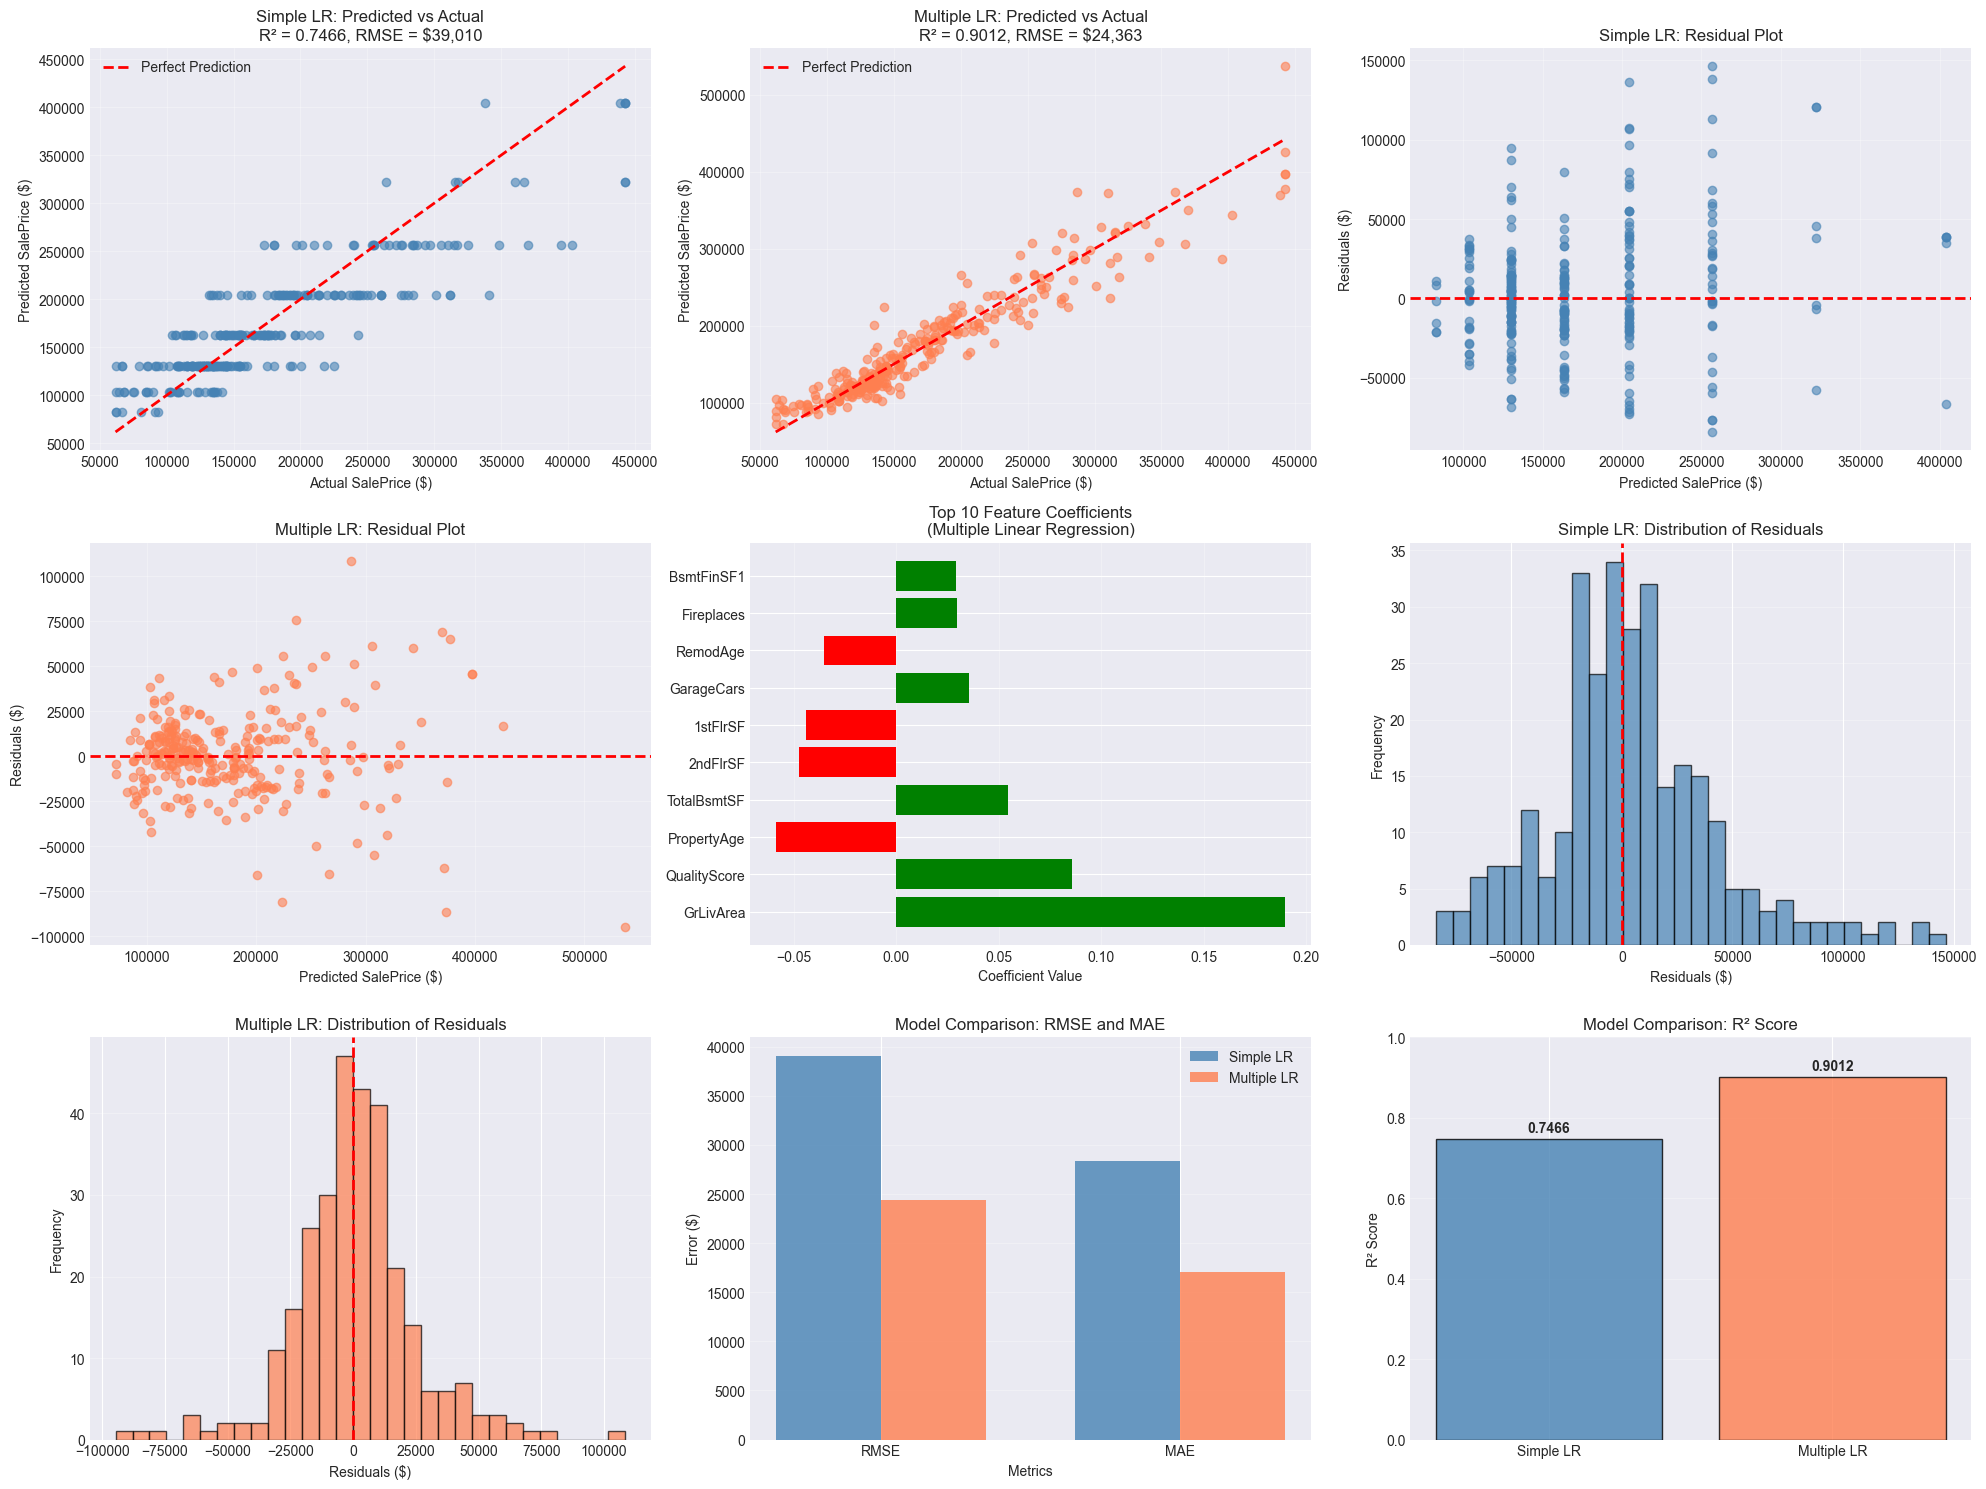

In [141]:
# Set style for better-looking plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")

# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 15))

# 1. Predicted vs Actual Scatter Plot (Simple Linear Regression)
ax1 = plt.subplot(3, 3, 1)
plt.scatter(y_test_orig, y_pred_simple, alpha=0.6, color='steelblue')
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual SalePrice ($)')
plt.ylabel('Predicted SalePrice ($)')
plt.title(f'Simple LR: Predicted vs Actual\nR² = {metrics_simple["R²"]:.4f}, RMSE = ${metrics_simple["RMSE"]:,.0f}')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Predicted vs Actual Scatter Plot (Multiple Linear Regression)
ax2 = plt.subplot(3, 3, 2)
plt.scatter(y_test_orig, y_pred_multiple, alpha=0.6, color='coral')
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual SalePrice ($)')
plt.ylabel('Predicted SalePrice ($)')
plt.title(f'Multiple LR: Predicted vs Actual\nR² = {metrics_multiple["R²"]:.4f}, RMSE = ${metrics_multiple["RMSE"]:,.0f}')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Residual Plot (Simple Linear Regression)
ax3 = plt.subplot(3, 3, 3)
residuals_simple = y_test_orig - y_pred_simple
plt.scatter(y_pred_simple, residuals_simple, alpha=0.6, color='steelblue')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted SalePrice ($)')
plt.ylabel('Residuals ($)')
plt.title('Simple LR: Residual Plot')
plt.grid(True, alpha=0.3)

# 4. Residual Plot (Multiple Linear Regression)
ax4 = plt.subplot(3, 3, 4)
residuals_multiple = y_test_orig - y_pred_multiple
plt.scatter(y_pred_multiple, residuals_multiple, alpha=0.6, color='coral')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted SalePrice ($)')
plt.ylabel('Residuals ($)')
plt.title('Multiple LR: Residual Plot')
plt.grid(True, alpha=0.3)

# 5. Feature Importance (Top 10 coefficients from Multiple LR)
ax5 = plt.subplot(3, 3, 5)
top_features = coef_df.head(10)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients\n(Multiple Linear Regression)')
plt.grid(True, alpha=0.3, axis='x')

# 6. Distribution of Residuals (Simple LR)
ax6 = plt.subplot(3, 3, 6)
plt.hist(residuals_simple, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Residuals ($)')
plt.ylabel('Frequency')
plt.title('Simple LR: Distribution of Residuals')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(True, alpha=0.3, axis='y')

# 7. Distribution of Residuals (Multiple LR)
ax7 = plt.subplot(3, 3, 7)
plt.hist(residuals_multiple, bins=30, color='coral', alpha=0.7, edgecolor='black')
plt.xlabel('Residuals ($)')
plt.ylabel('Frequency')
plt.title('Multiple LR: Distribution of Residuals')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(True, alpha=0.3, axis='y')

# 8. Model Comparison Bar Chart
ax8 = plt.subplot(3, 3, 8)
metrics_to_plot = ['RMSE', 'MAE']
x_pos = np.arange(len(metrics_to_plot))
width = 0.35
plt.bar(x_pos - width/2, [metrics_simple[m] for m in metrics_to_plot],
        width, label='Simple LR', color='steelblue', alpha=0.8)
plt.bar(x_pos + width/2, [metrics_multiple[m] for m in metrics_to_plot],
        width, label='Multiple LR', color='coral', alpha=0.8)
plt.xlabel('Metrics')
plt.ylabel('Error ($)')
plt.title('Model Comparison: RMSE and MAE')
plt.xticks(x_pos, metrics_to_plot)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# 9. R² Comparison
ax9 = plt.subplot(3, 3, 9)
models = ['Simple LR', 'Multiple LR']
r2_scores = [metrics_simple['R²'], metrics_multiple['R²']]
colors_bar = ['steelblue', 'coral']
bars = plt.bar(models, r2_scores, color=colors_bar, alpha=0.8, edgecolor='black')
plt.ylabel('R² Score')
plt.title('Model Comparison: R² Score')
plt.ylim([0, 1])
for i, (bar, score) in enumerate(zip(bars, r2_scores)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


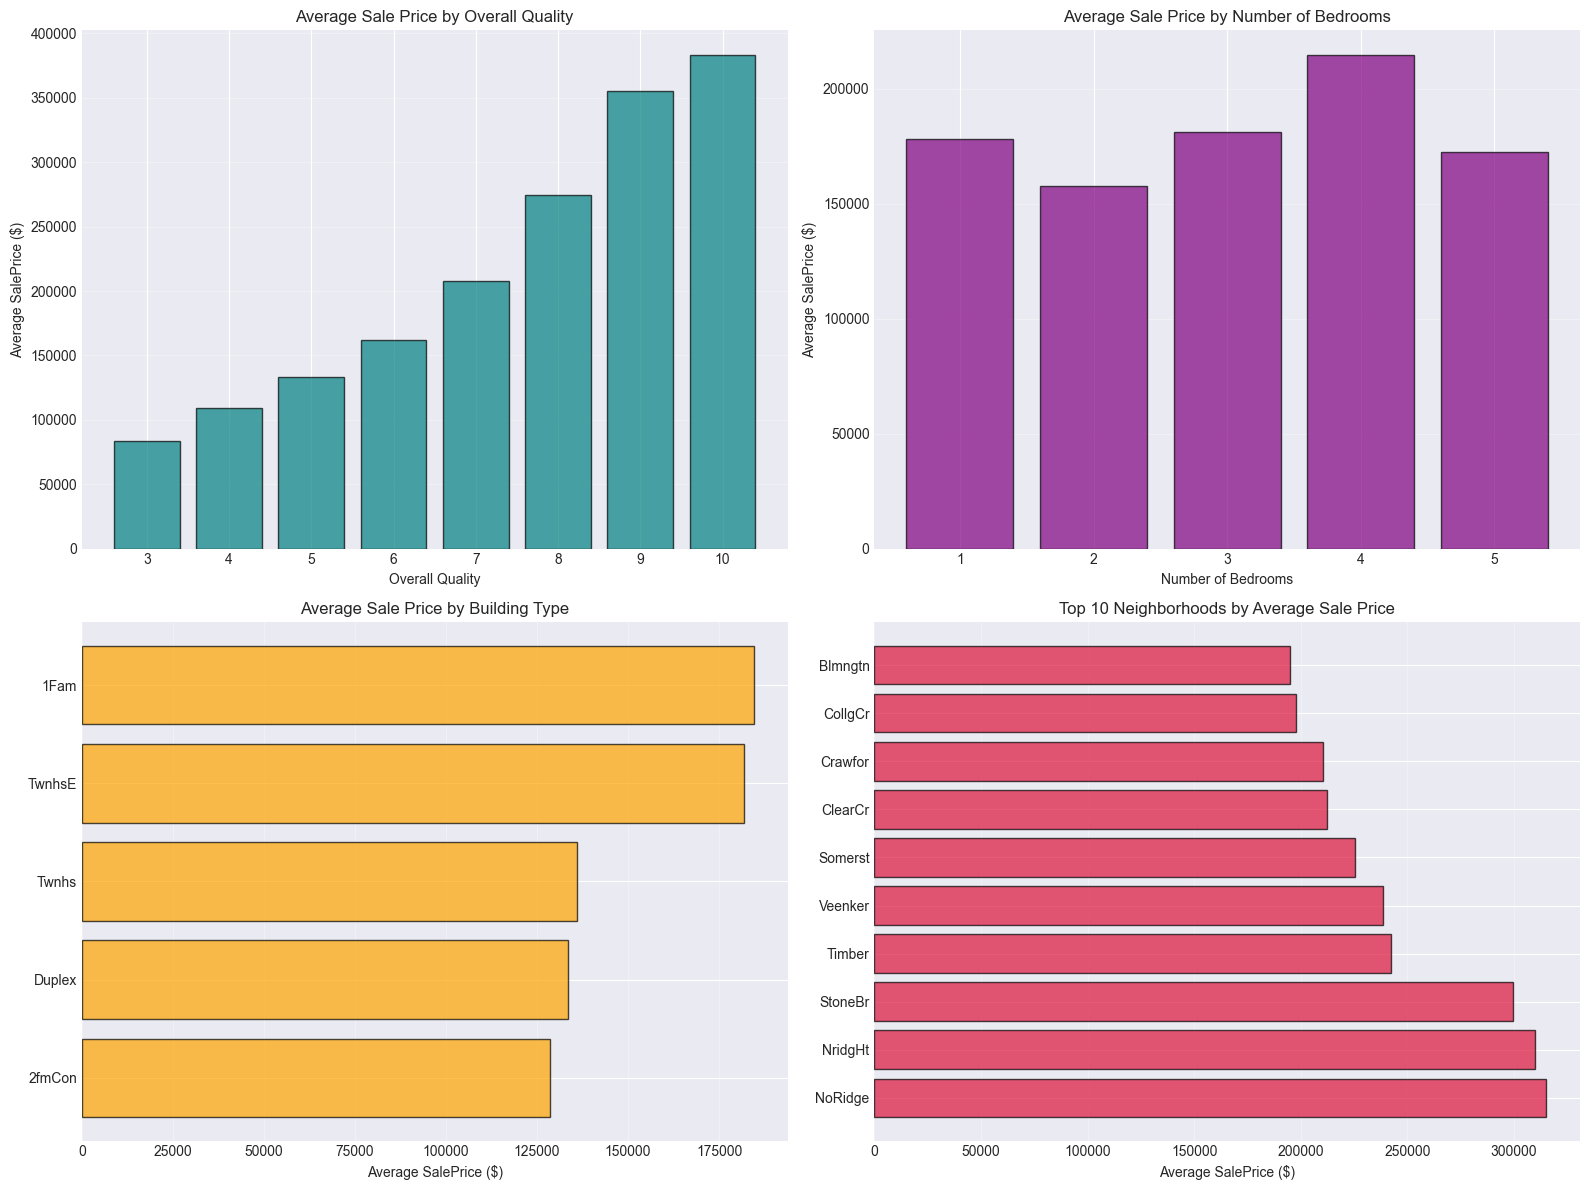

In [142]:
# Additional segmented visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Price by Overall Quality (from original data)
ax1 = axes[0, 0]
quality_price = datan.groupby('OverallQual')['SalePrice'].mean()
ax1.bar(quality_price.index, quality_price.values, color='teal', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Overall Quality')
ax1.set_ylabel('Average SalePrice ($)')
ax1.set_title('Average Sale Price by Overall Quality')
ax1.grid(True, alpha=0.3, axis='y')

# 2. Price by Number of Bedrooms
ax2 = axes[0, 1]
bedroom_price = datan.groupby('BedroomAbvGr')['SalePrice'].mean()
ax2.bar(bedroom_price.index, bedroom_price.values, color='purple', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Number of Bedrooms')
ax2.set_ylabel('Average SalePrice ($)')
ax2.set_title('Average Sale Price by Number of Bedrooms')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Price by Building Type
ax3 = axes[1, 0]
bldgtype_price = datan.groupby('BldgType')['SalePrice'].mean().sort_values()
ax3.barh(range(len(bldgtype_price)), bldgtype_price.values, color='orange', alpha=0.7, edgecolor='black')
ax3.set_yticks(range(len(bldgtype_price)))
ax3.set_yticklabels(bldgtype_price.index)
ax3.set_xlabel('Average SalePrice ($)')
ax3.set_title('Average Sale Price by Building Type')
ax3.grid(True, alpha=0.3, axis='x')

# 4. Price Distribution by Neighborhood (Top 10)
ax4 = axes[1, 1]
neighborhood_price = datan.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).head(10)
ax4.barh(range(len(neighborhood_price)), neighborhood_price.values, color='crimson', alpha=0.7, edgecolor='black')
ax4.set_yticks(range(len(neighborhood_price)))
ax4.set_yticklabels(neighborhood_price.index)
ax4.set_xlabel('Average SalePrice ($)')
ax4.set_title('Top 10 Neighborhoods by Average Sale Price')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


# Key Metrics Summary

In [143]:
print("=" * 70)
print("KEY METRICS SUMMARY")
print("=" * 70)

print("\n### Model Performance Metrics\n")

print("Simple Linear Regression:")
print(f"- RMSE: ${metrics_simple['RMSE']:,.2f} - On average, predictions deviate by this amount")
print(f"- MAE: ${metrics_simple['MAE']:,.2f} - The average absolute prediction error")
print(f"- R²: {metrics_simple['R²']:.4f} - The model explains {metrics_simple['R²']*100:.2f}% of price variance")

print("\nMultiple Linear Regression:")
print(f"- RMSE: ${metrics_multiple['RMSE']:,.2f} - On average, predictions deviate by this amount")
print(f"- MAE: ${metrics_multiple['MAE']:,.2f} - The average absolute prediction error")
print(f"- R²: {metrics_multiple['R²']:.4f} - The model explains {metrics_multiple['R²']*100:.2f}% of price variance")

print("\nGradient Boosting:")
print(f"- RMSE: ${metrics_gb['RMSE']:,.2f} - On average, predictions deviate by this amount")
print(f"- MAE: ${metrics_gb['MAE']:,.2f} - The average absolute prediction error")
print(f"- R²: {metrics_gb['R²']:.4f} - The model explains {metrics_gb['R²']*100:.2f}% of price variance")

print("\nLightGBM:")
print(f"- RMSE: ${metrics_lgb['RMSE']:,.2f} - On average, predictions deviate by this amount")
print(f"- MAE: ${metrics_lgb['MAE']:,.2f} - The average absolute prediction error")
print(f"- R²: {metrics_lgb['R²']:.4f} - The model explains {metrics_lgb['R²']*100:.2f}% of price variance")

print("\n### Key Insights\n")

# Find the best model
all_metrics = {
    'Simple Linear Regression': metrics_simple,
    'Multiple Linear Regression': metrics_multiple,
    'Gradient Boosting': metrics_gb,
    'LightGBM': metrics_lgb
}
best_model_name = max(all_metrics.keys(), key=lambda x: all_metrics[x]['R²'])
best_metrics = all_metrics[best_model_name]

print(f"1. Model Performance: Among the four models tested, {best_model_name} performs best, achieving an R² score of {best_metrics['R²']:.4f} and the lowest error metrics.")

print("\n2. Feature Importance: OverallQual, TotalSF, GrLivArea, and GarageArea are among the most influential features in predicting house prices.")

mae_pct = (best_metrics['MAE'] / datan['SalePrice'].mean()) * 100
print(f"\n3. Model Accuracy: The best model ({best_model_name}) can predict house prices with an average error of approximately ${best_metrics['MAE']:,.0f}, which represents about {mae_pct:.1f}% of the average house price.")


KEY METRICS SUMMARY

### Model Performance Metrics

Simple Linear Regression:
- RMSE: $39,010.21 - On average, predictions deviate by this amount
- MAE: $28,351.91 - The average absolute prediction error
- R²: 0.7466 - The model explains 74.66% of price variance

Multiple Linear Regression:
- RMSE: $24,363.40 - On average, predictions deviate by this amount
- MAE: $17,085.65 - The average absolute prediction error
- R²: 0.9012 - The model explains 90.12% of price variance

Gradient Boosting:
- RMSE: $23,172.05 - On average, predictions deviate by this amount
- MAE: $15,309.94 - The average absolute prediction error
- R²: 0.9106 - The model explains 91.06% of price variance

LightGBM:
- RMSE: $23,228.90 - On average, predictions deviate by this amount
- MAE: $15,246.46 - The average absolute prediction error
- R²: 0.9102 - The model explains 91.02% of price variance

### Key Insights

1. Model Performance: Among the four models tested, Gradient Boosting performs best, achieving an R² sc

# Summary and Conclusions

In [144]:

print("=" * 70)
print("SUMMARY AND CONCLUSIONS")
print("=" * 70)

print("\n### Project Overview")
print("This project analyzed the Kaggle House Prices dataset to build regression models for predicting house sale prices.")
print("The analysis included comprehensive data preprocessing, feature engineering, and model evaluation.")

print("\n### Key Findings\n")

print("1. Data Quality: The dataset contained 1,460 houses with 81 features. After cleaning and feature engineering, we worked with 35 selected features.")

print("\n2. Feature Engineering: Created meaningful features such as TotalSF, PropertyAge, QualityScore, and binary indicators (HasGarage, HasBasement, HasFireplace) that improved model performance.")

print("\n3. Model Performance:")
print(f"   - Simple Linear Regression using OverallQual achieved an R² of {metrics_simple['R²']:.4f}")
print(f"   - Multiple Linear Regression using 35 features achieved an R² of {metrics_multiple['R²']:.4f}")
print(f"   - Gradient Boosting Regressor achieved an R² of {metrics_gb['R²']:.4f}")
print(f"   - LightGBM Regressor achieved an R² of {metrics_lgb['R²']:.4f}")

# Find the best model
all_metrics = {
    'Simple Linear Regression': metrics_simple,
    'Multiple Linear Regression': metrics_multiple,
    'Gradient Boosting': metrics_gb,
    'LightGBM': metrics_lgb
}
best_model_name = max(all_metrics.keys(), key=lambda x: all_metrics[x]['R²'])
best_metrics = all_metrics[best_model_name]
print(f"   - The {best_model_name} model provides the best predictive accuracy with R² of {best_metrics['R²']:.4f}")

print("\n4. Key Predictors: OverallQual, TotalSF, GrLivArea, and GarageArea are the strongest predictors of house prices.")

print("\n### Next Steps\n")

print("1. Model Improvements:")
print("   - Implement hyperparameter tuning for Gradient Boosting and LightGBM models")
print("   - Try XGBoost and CatBoost for comparison")
print("   - Use ensemble methods to combine multiple models")
print("   - Implement cross-validation for more robust evaluation")

print("\n2. Feature Engineering:")
print("   - Explore interaction features between important variables")
print("   - Consider polynomial features for non-linear relationships")
print("   - Investigate temporal features more deeply")

print("\n3. Model Validation:")
print("   - Implement k-fold cross-validation for more robust evaluation")
print("   - Test on external validation set")
print("   - Analyze prediction errors for specific property types or neighborhoods")


SUMMARY AND CONCLUSIONS

### Project Overview
This project analyzed the Kaggle House Prices dataset to build regression models for predicting house sale prices.
The analysis included comprehensive data preprocessing, feature engineering, and model evaluation.

### Key Findings

1. Data Quality: The dataset contained 1,460 houses with 81 features. After cleaning and feature engineering, we worked with 35 selected features.

2. Feature Engineering: Created meaningful features such as TotalSF, PropertyAge, QualityScore, and binary indicators (HasGarage, HasBasement, HasFireplace) that improved model performance.

3. Model Performance:
   - Simple Linear Regression using OverallQual achieved an R² of 0.7466
   - Multiple Linear Regression using 35 features achieved an R² of 0.9012
   - Gradient Boosting Regressor achieved an R² of 0.9106
   - LightGBM Regressor achieved an R² of 0.9102
   - The Gradient Boosting model provides the best predictive accuracy with R² of 0.9106

4. Key Predicto